<a href="https://colab.research.google.com/github/007sanjib/My-test/blob/master/Project_9_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment - Problem Statement


## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

## Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

Regards

Program Office

Happy Learning!


## Scoring guide (Rubric) - Twitter US Airline Sentiment

### Criteria	Points

Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.
4

Exploratory data analysis
Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.
9

Understanding of Data Columns
Drop unnecessary columns, chek shape of the data, print 1st few rows of data.
3

Data Pre - Processing
Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.
12

Vectorization
Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
8

Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)
14

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.
6

Overall Structure and flow ofNotebook
Structure and flow Well commented code
4

Points	60


# Project Solution - The Answer by Sanjib: 

Date : Oct-31-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*




In [794]:
!python --version

Python 3.7.12


In [795]:
!pip install pandas-profiling==2.8.0 --user pandas-profiling



In [796]:
!pip install emoji
# !pip install emot --upgrade
# !pip install demoji

In [797]:
!pip install bs4

In [798]:

!pip install contractions

In [799]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np
import pandas_profiling as pf

import copy

from datetime import datetime

import seaborn as sns # for data visualization 
import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

from bs4 import BeautifulSoup    
import contractions   

import emoji

import re, string, unicodedata 
import pickle

# import emot
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from sklearn.utils import class_weight 

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer                        # Text tokenization utility class.
from tensorflow.keras.preprocessing.sequence import pad_sequences                # Pads sequences to the same length.
from tensorflow.keras.models import Sequential                                   # 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional      #Keras layers API.

import tensorflow_datasets as tfds


# Model hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import nltk
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import pickle
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers

sns.set(color_codes=True)  # keeps the colored grid in the plot background
sns.set_context("talk")  # talk : bolds the plots
plt.style.use("seaborn-notebook")  # set a default style while plotting

In [800]:
print(tf.__version__)

2.6.0


# 1. Overview of the Dataset

 Load the data and perform priliminary analysis

In [801]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive' ,force_remount=False) #force_remount=True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [802]:
!ls /content/drive/MyDrive/Colab\ Notebooks


'Copy of Project_9_NLP_Twitter_Sentiment_Analysis.ipynb'   tweet-clean_bak1.csv
 images.npy						   tweet-clean.csv
 Labels.csv						   Tweets.csv
 Project_8_Plant_Seedling_Classification.ipynb		   UT-Austin
 Project_9_NLP_Twitter_Sentiment_Analysis.ipynb


In [803]:
df_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

df_tweets

tweet_id           airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513   neutral         1.0000                          
1      570301130888122368  positive         0.3486                          
2      570301083672813571   neutral         0.6837                          
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
...                   ...               ...                           ...   
14635  569587686496825344  positive         0.3487                          
14636  569587371693355008  negative         1.0000                          
14637  569587242672398336   neutral         1.0000                          
14638  569587188687634433  negative         1.0000                          
14639  569587140490866689   neutral         0.6771                          

      negativereason           negativereason_confidence airline          \
0                         NaN    nan                      Virgin America   
1                         NaN 0.0000                      Virgin America   
2                         NaN    nan                      Virgin America   
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
...                       ...                        ...             ...   
14635                     NaN 0.0000                            American   
14636  Customer Service Issue 1.0000                            American   
14637                     NaN    nan                            American   
14638  Customer Service Issue 0.6659                            American   
14639                     NaN 0.0000                            American   

      airline_sentiment_gold name             negativereason_gold  \
0      NaN                            cairdin  NaN                  
1      NaN                           jnardino  NaN                  
2      NaN                         yvonnalynn  NaN                  
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
...                      ...              ...                 ...   
14635  NaN                    KristenReenders  NaN                  
14636  NaN                           itsropes  NaN                  
14637  NaN                           sanyabun  NaN                  
14638  NaN                         SraJackson  NaN                  
14639  NaN                          daviddtwu  NaN                  

       retweet_count  \
0      0               
1      0               
2      0               
3      0               
4      0               
...              ...   
14635  0               
14636  0               
14637  0               
14638  0               
14639  0               

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                  

In [804]:
df_tweets.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [805]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [806]:
df_tweets.describe(include="all").T


count       unique top                          \
tweet_id                     14,640.0000    NaN                         NaN   
airline_sentiment                  14640      3                    negative   
airline_sentiment_confidence 14,640.0000    NaN                         NaN   
negativereason                      9178     10      Customer Service Issue   
negativereason_confidence    10,522.0000    NaN                         NaN   
airline                            14640      6                      United   
airline_sentiment_gold                40      3                    negative   
name                               14640   7701                 JetBlueNews   
negativereason_gold                   32     13      Customer Service Issue   
retweet_count                14,640.0000    NaN                         NaN   
text                               14640  14427              @united thanks   
tweet_coord                         1019    832                  [0.0, 0.0]   
tweet_created                      14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                      9907   3081                  Boston, MA   
user_timezone                       9820     85  Eastern Time (US & Canada)   

                             freq  mean                          \
tweet_id                       NaN 569,218,351,767,382,528.0000   
airline_sentiment             9178                          NaN   
airline_sentiment_confidence   NaN                       0.9002   
negativereason                2910                          NaN   
negativereason_confidence      NaN                       0.6383   
airline                       3822                          NaN   
airline_sentiment_gold          32                          NaN   
name                            63                          NaN   
negativereason_gold             12                          NaN   
retweet_count                  NaN                       0.0827   
text                             6                          NaN   
tweet_coord                    164                          NaN   
tweet_created                    5                          NaN   
tweet_location                 157                          NaN   
user_timezone                 3744                          NaN   

                             std                       \
tweet_id                     779,111,158,481,836.7500   
airline_sentiment                                 NaN   
airline_sentiment_confidence                   0.1628   
negativereason                                    NaN   
negativereason_confidence                      0.3304   
airline                                           NaN   
airline_sentiment_gold                            NaN   
name                                              NaN   
negativereason_gold                               NaN   
retweet_count                                  0.7458   
text                                              NaN   
tweet_coord                                       NaN   
tweet_created                                     NaN   
tweet_location                                    NaN   
user_timezone                                     NaN   

                             min                           \
tweet_id                     567,588,278,875,213,824.0000   
airline_sentiment                                     NaN   
airline_sentiment_confidence                       0.3350   
negativereason                                        NaN   
negativereason_confidence                          0.0000   
airline                                               NaN   
airline_sentiment_gold                                NaN   
name                                                  NaN   
negativereason_gold                                   NaN   
retweet_count                                      0.0000   
text                                                  NaN   
tweet_coord                                   

### Observation by Sanjib:

1. The data is spread over 85 time zones and 3081 locations. Next, we can check the distribution of tweet_created. Thereafter, the sample dataset may be assumed to be good representation of the population of data.

2. 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


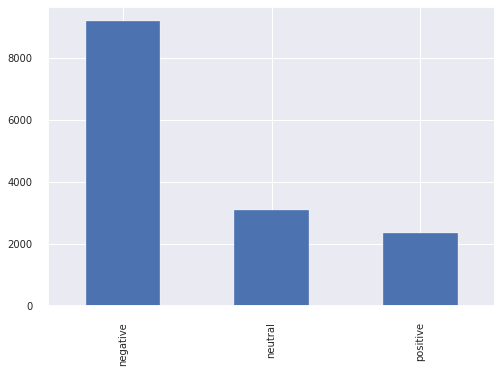

In [807]:
print(df_tweets["airline_sentiment"].value_counts())

df_tweets["airline_sentiment"].value_counts().plot(kind="bar")

### Observation by Sanjib:

1. The "airline_sentiment" is likely to be the target variable, we'll confirm with futher EDA. The variable "airline_sentiment" does not have any missing value.

In [808]:
df_tweets["airline_sentiment"].value_counts(normalize=True)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64

# 2. Exploratory Data Analysis:

In [809]:
%%time
df_tweets.profile_report(title="Pandas Profiling of Tweet Data")


CPU times: user 30.9 ms, sys: 932 µs, total: 31.8 ms
Wall time: 31 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [810]:
print("Mininum tweet_created =",min(pd.to_datetime(df_tweets["tweet_created"])),
      "Maximum tweet_created =", max(pd.to_datetime(df_tweets["tweet_created"])))

Mininum tweet_created = 2015-02-16 23:36:05-08:00 Maximum tweet_created = 2015-02-24 11:53:37-08:00


In [811]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "name",
                     "negativereason",
                     "tweet_location", 
                      ]

for col in column_categories:
    print("="*40, col)
    print(df_tweets[col].value_counts() )



======================================== airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
======================================== retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64
======================================== user_timezone
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                    

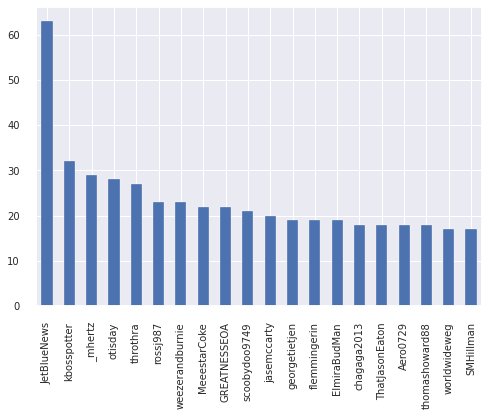

In [812]:
# top 20 users by number of tweets
df_tweets["name"].value_counts().head(20).plot(kind="bar");

### Observation by Sanjib:
1. The JetBlueNews mention (name) looks like sponsored by company, and would never tweet negative sentiment.


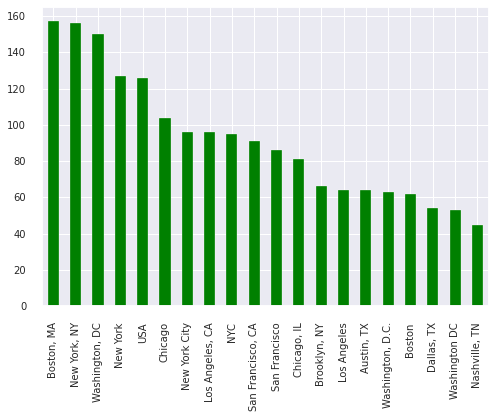

In [813]:
# top 20 locations by number of tweets
df_tweets["tweet_location"].value_counts().head(20).plot(kind="bar",
                                                         color="Green");

In [814]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
Bad Flight                    87        64     90        104         216      
Can't Tell                   198       186    159        246         379      
Cancelled Flight             246        51    162        189         181      
Customer Service Issue       768       199    391        811         681      
Damaged Luggage               12        11     14         11          22      
Flight Attendant Complaints   87        60     38        123         168      
Flight Booking Problems      130        44     61        122         144      
Late Flight                  249       269    152        453         525      
Lost Luggage                 149        57     90        154         269      
longlines                     34        14     29         50          48      

airline                      Virgin America  
negativereason                               
Bad Flight                   19              
Can't Tell                   22              
Cancelled Flight             18              
Customer Service Issue       60              
Damaged Luggage               4              
Flight Attendant Complaints   5              
Flight Booking Problems      28              
Late Flight                  17              
Lost Luggage                  5              
longlines                     3

In [815]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="retweet_count",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

retweet_count                0          1        2       3      4      5      \
negativereason                                                                 
Bad Flight                    541.0000  35.0000  2.0000 2.0000    nan    nan   
Can't Tell                  1,099.0000  74.0000  4.0000 5.0000 3.0000    nan   
Cancelled Flight              803.0000  33.0000  7.0000 1.0000 2.0000 1.0000   
Customer Service Issue      2,721.0000 166.0000 17.0000 3.0000 3.0000    nan   
Damaged Luggage                72.0000   1.0000     nan    nan 1.0000    nan   
Flight Attendant Complaints   442.0000  35.0000  3.0000 1.0000    nan    nan   
Flight Booking Problems       503.0000  20.0000  3.0000    nan 1.0000 1.0000   
Late Flight                 1,558.0000 102.0000  3.0000    nan 1.0000    nan   
Lost Luggage                  673.0000  49.0000  2.0000    nan    nan    nan   
longlines                     169.0000   9.0000     nan    nan    nan    nan   

retweet_count                7      18     22     31     32     44     
negativereason                                                         
Bad Flight                     nan    nan    nan    nan    nan    nan  
Can't Tell                  1.0000 1.0000 1.0000 1.0000 1.0000    nan  
Cancelled Flight               nan    nan    nan    nan    nan    nan  
Customer Service Issue         nan    nan    nan    nan    nan    nan  
Damaged Luggage                nan    nan    nan    nan    nan    nan  
Flight Attendant Complaints    nan    nan    nan    nan    nan    nan  
Flight Booking Problems     1.0000    nan    nan    nan    nan    nan  
Late Flight                    nan    nan    nan    nan    nan 1.0000  
Lost Luggage                   nan    nan    nan    nan    nan    nan  
longlines                      nan    nan    nan    nan    nan    nan

In [816]:
# df_pivot*100.0/df_tweets.shape[0]



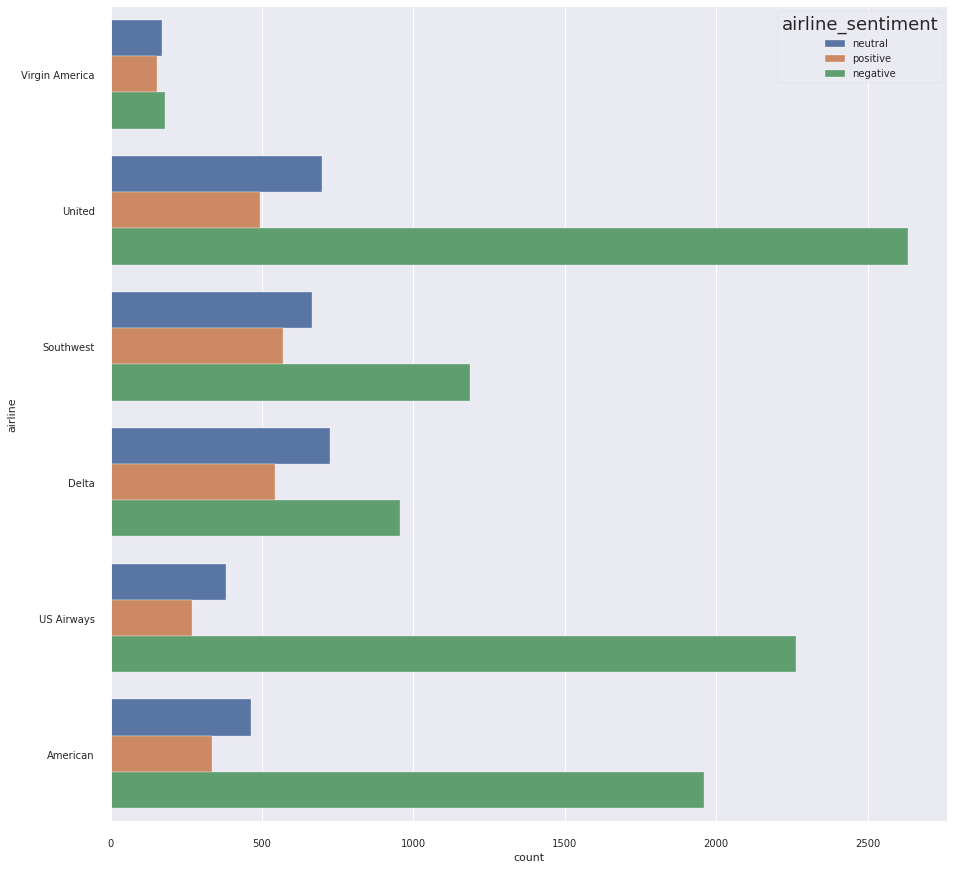

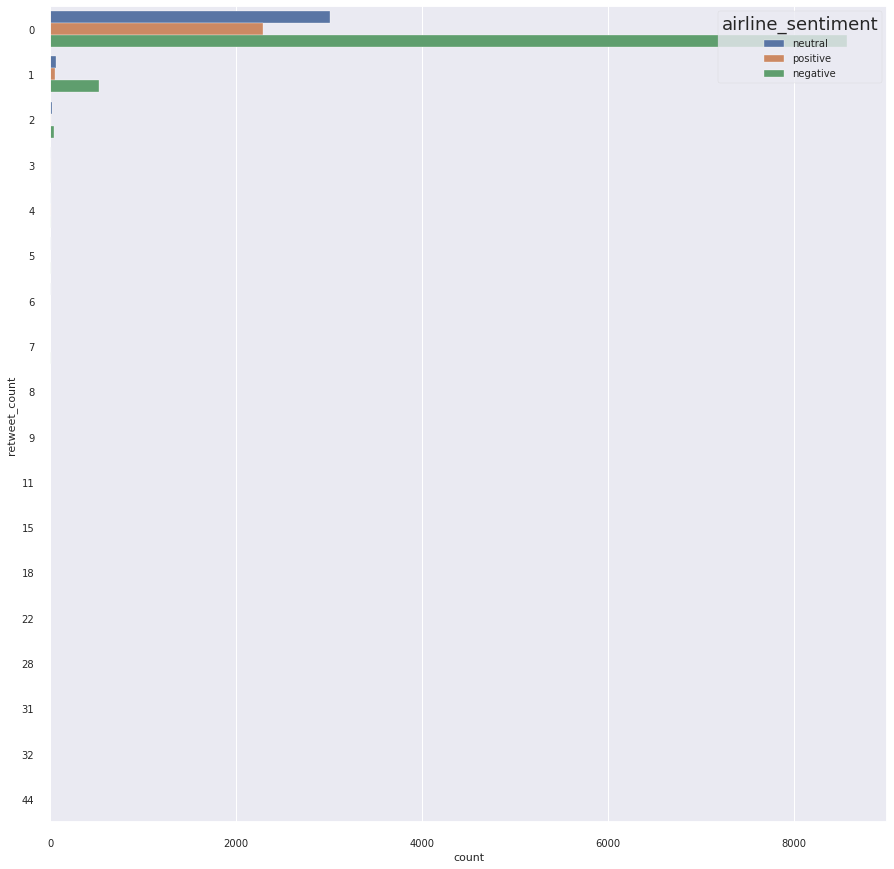

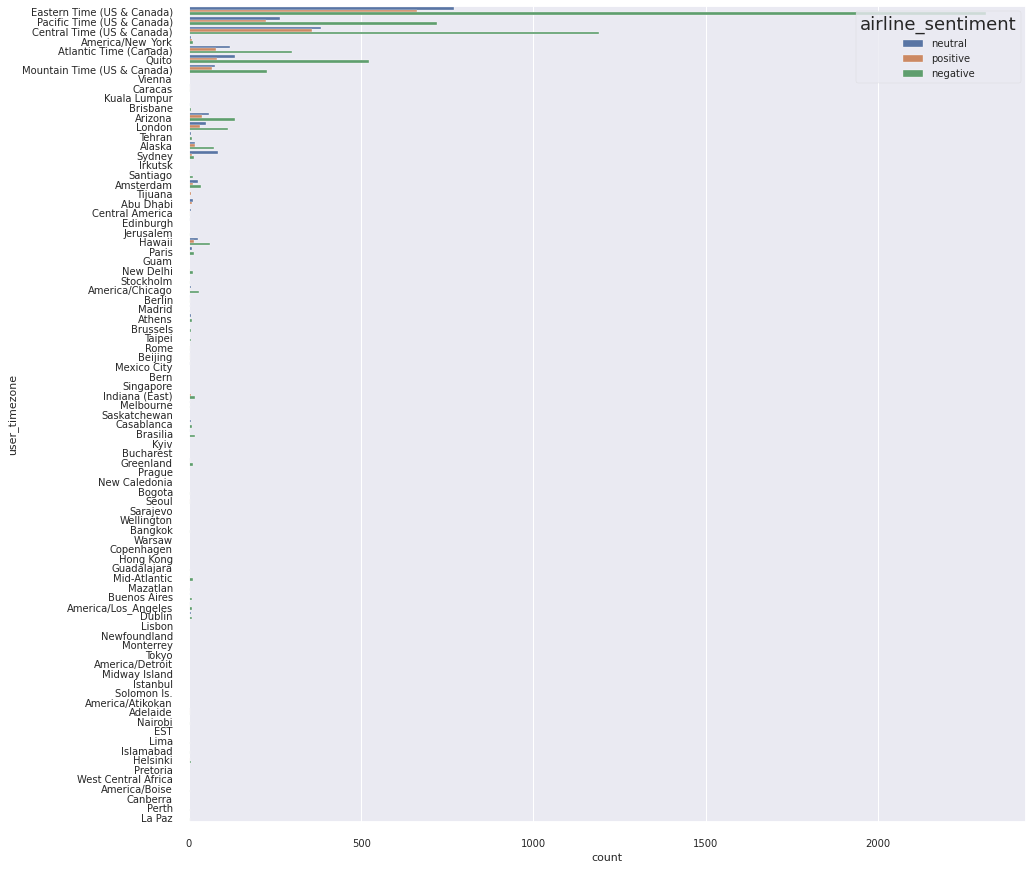

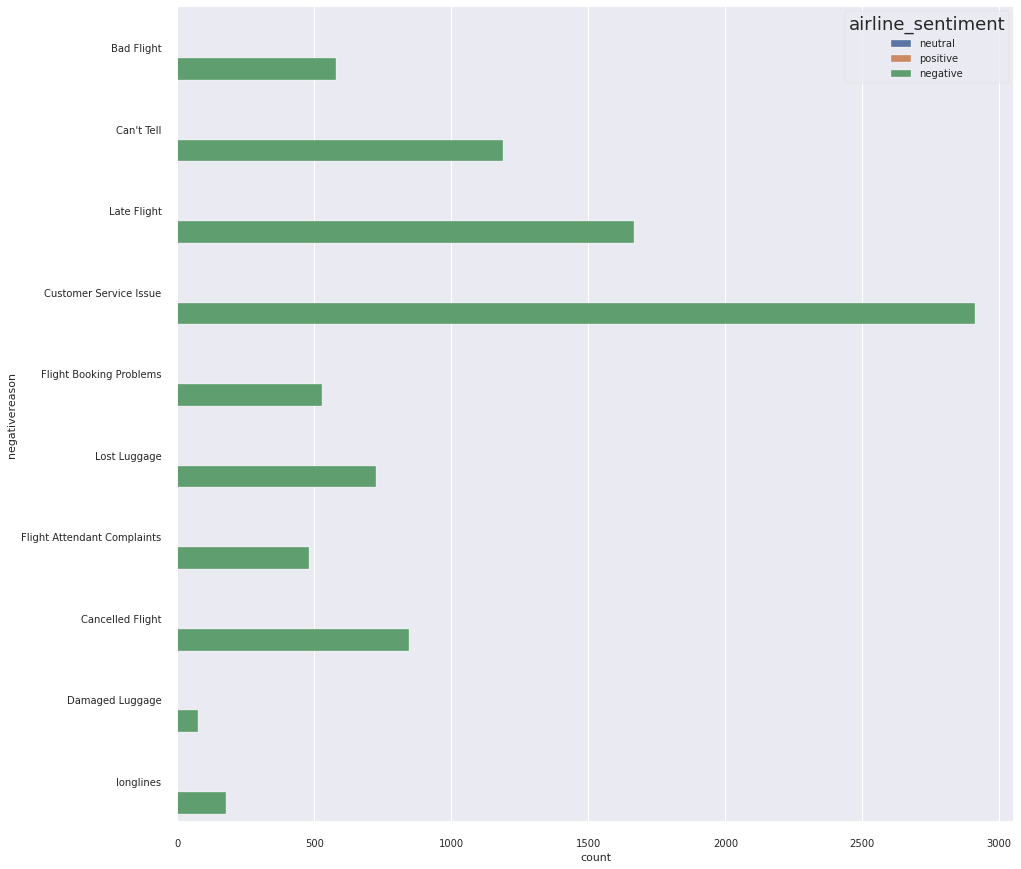

CPU times: user 2.54 s, sys: 62.7 ms, total: 2.6 s
Wall time: 2.57 s


In [817]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "negativereason"
                    #  "name",
                    #  "tweet_location", 
                      ]

for col in column_categories:
  plt.figure(figsize=(15,15))
  sns.countplot(data=df_tweets,
              # y="tweet_id",
              y=col,
              hue="airline_sentiment"
              )
  plt.show()

In [818]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="retweet_count",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative   neutral    positive 
retweet_count                                     
0                 8,581.0000 3,005.0000 2,287.0000
1                   524.0000    63.0000    53.0000
2                    41.0000    16.0000     9.0000
3                    12.0000     7.0000     3.0000
4                    11.0000     2.0000     4.0000
5                     2.0000     2.0000     1.0000
6                        nan     2.0000     1.0000
7                     2.0000        nan     1.0000
8                        nan        nan     1.0000
9                        nan        nan     1.0000
11                       nan        nan     1.0000
15                       nan     1.0000        nan
18                    1.0000        nan        nan
22                    1.0000        nan     1.0000
28                       nan     1.0000        nan
31                    1.0000        nan        nan
32                    1.0000        nan        nan
44                    1.0000        nan        nan

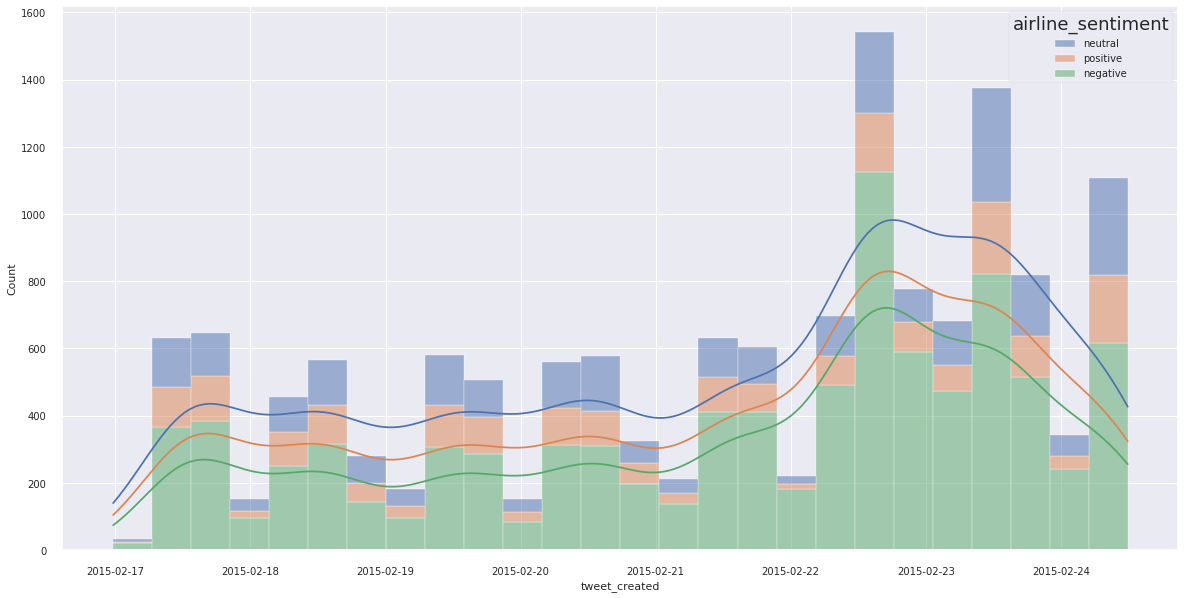

In [819]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline_sentiment",
            multiple="stack",
            kde=True
            )

plt.show()

In [820]:
datetime(2015,2,23).strftime("%A")
# pd.Timestamp("2015-02-23").weekday_name

'Monday'

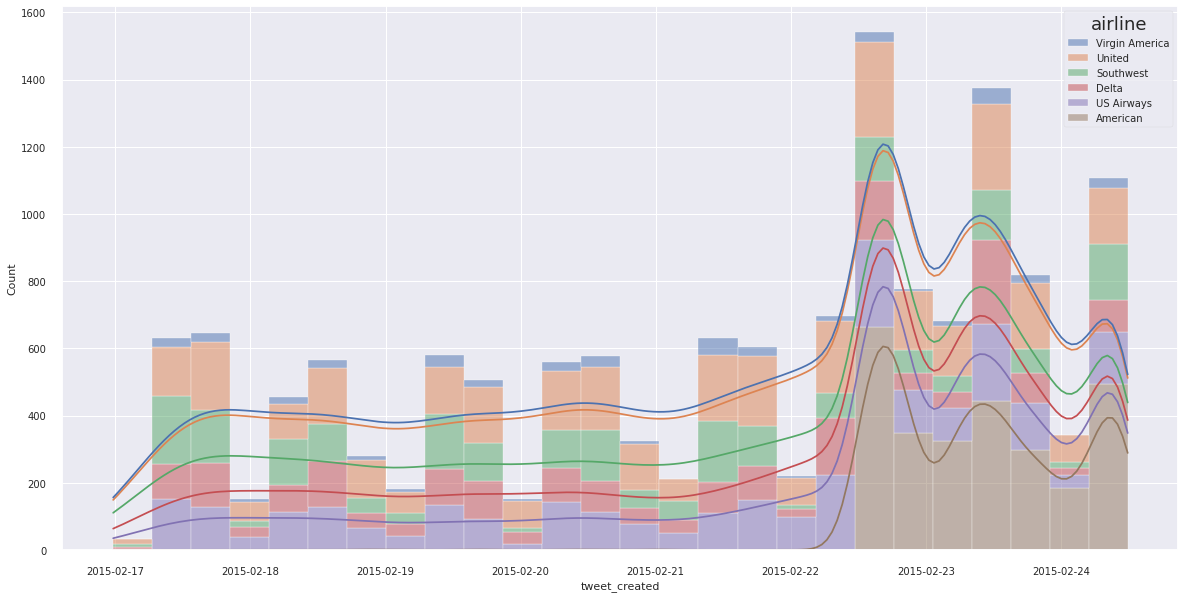

In [821]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline",
            multiple="stack",
            kde=True
            )

plt.show()

In [822]:
df_tweets["text"].sample(10)

12136    @AmericanAir my flight 386 from Jacksonville fl to Dallas is showing Cancelled Flightled. What is going on?  Am I rebooked on another flight?
3951      @united Flight 512 had sime of the rudest flight attendants. I was run over by the drink card and had a flashlight dropped on me. #noapology
10704                                      @USAirways talked to Supervisor Jeanine and she couldn't help me. 45 minutes of talking to her and nothing.
3316                                                                                       @united keeps delaying my flight, horrible customer service
252                                           @VirginAmerica thank you for the easy itinerary shift for impending weather. Quick, painless &amp; free.
11071                                      @USAirways should take a lesson from @SouthwestAir and wait for passengers from connecting flights. Shame..
12831                                                                                         

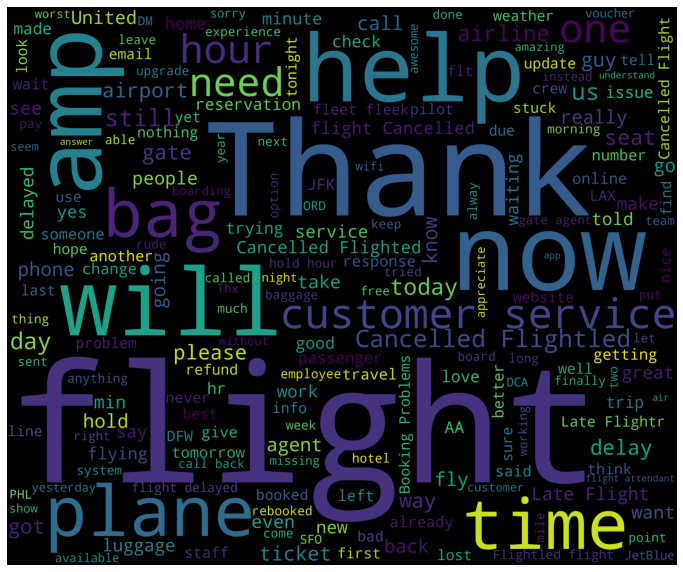

CPU times: user 20.7 s, sys: 172 ms, total: 20.9 s
Wall time: 20.8 s


In [823]:
%%time

words = ' '.join(df_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                     

In [824]:
df_tweets.loc[df_tweets['airline_sentiment']=='negative']

tweet_id           airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
5      570300767074181121  negative         1.0000                          
15     570282469121007616  negative         0.6842                          
17     570276917301137409  negative         1.0000                          
...                   ...               ...                           ...   
14631  569588464896876545  negative         1.0000                          
14633  569587705937600512  negative         1.0000                          
14634  569587691626622976  negative         0.6684                          
14636  569587371693355008  negative         1.0000                          
14638  569587188687634433  negative         1.0000                          

      negativereason           negativereason_confidence airline          \
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
5                  Can't Tell 0.6842                      Virgin America   
15                Late Flight 0.3684                      Virgin America   
17                 Bad Flight 1.0000                      Virgin America   
...                       ...                        ...             ...   
14631              Bad Flight 1.0000                            American   
14633        Cancelled Flight 1.0000                            American   
14634             Late Flight 0.6684                            American   
14636  Customer Service Issue 1.0000                            American   
14638  Customer Service Issue 0.6659                            American   

      airline_sentiment_gold name             negativereason_gold  \
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
5      NaN                           jnardino  NaN                  
15     NaN                    smartwatermelon  NaN                  
17     NaN                      heatherovieda  NaN                  
...                      ...              ...                 ...   
14631  NaN                           MDDavis7  NaN                  
14633  NaN                    RussellsWriting  NaN                  
14634  NaN                      GolfWithWoody  NaN                  
14636  NaN                           itsropes  NaN                  
14638  NaN                         SraJackson  NaN                  

       retweet_count  \
3      0               
4      0               
5      0               
15     0               
17     0               
...              ...   
14631  0               
14633  0               
14634  0               
14636  0               
14638  0               

      text                                                                                                                                                     \
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17                  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
...                                                                                  

********************************************************************************
****************************** negative


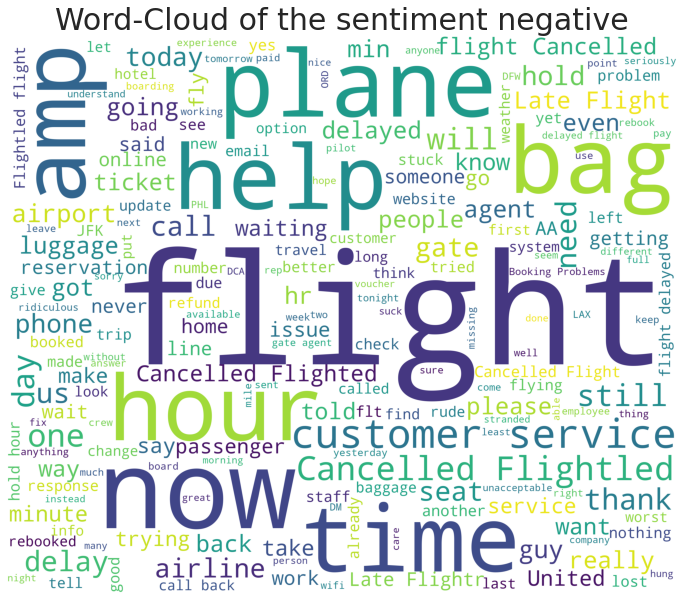

********************************************************************************
****************************** neutral


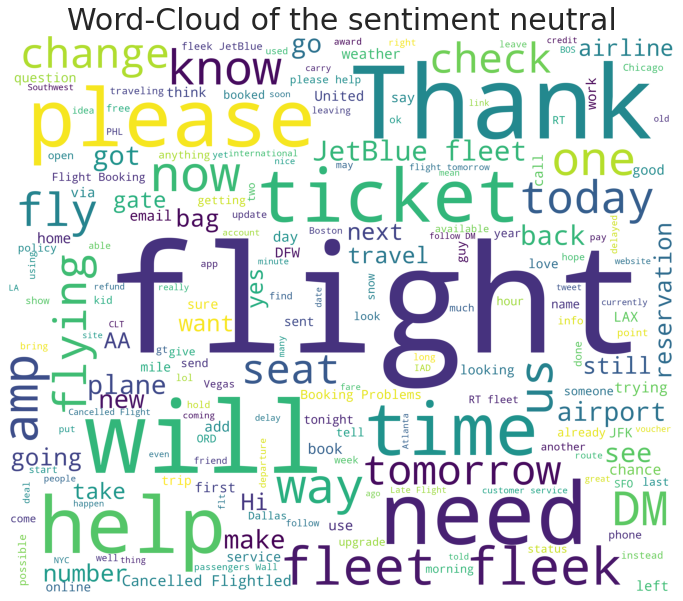

********************************************************************************
****************************** positive


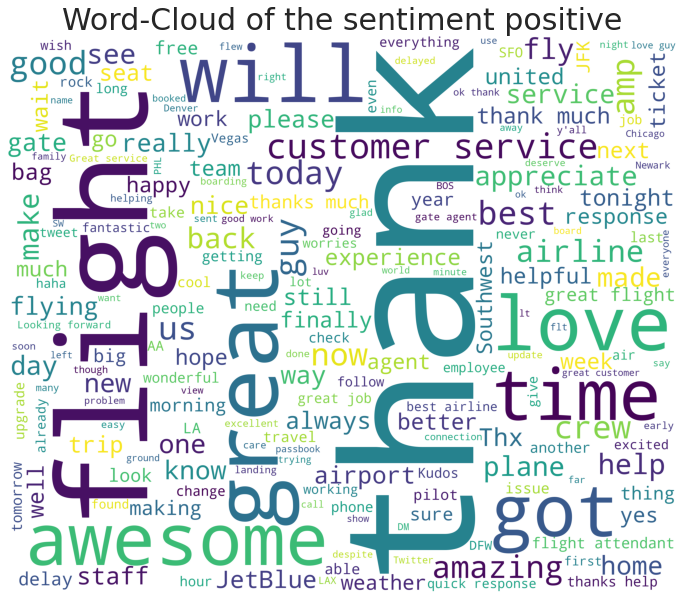

CPU times: user 1min 4s, sys: 473 ms, total: 1min 4s
Wall time: 1min 4s


In [825]:
%%time
for col_value in list(df_tweets["airline_sentiment"].value_counts().index):
  print("*"*80)
  print("*"*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline_sentiment']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.axis('off')
  plt.show()   

============================== United


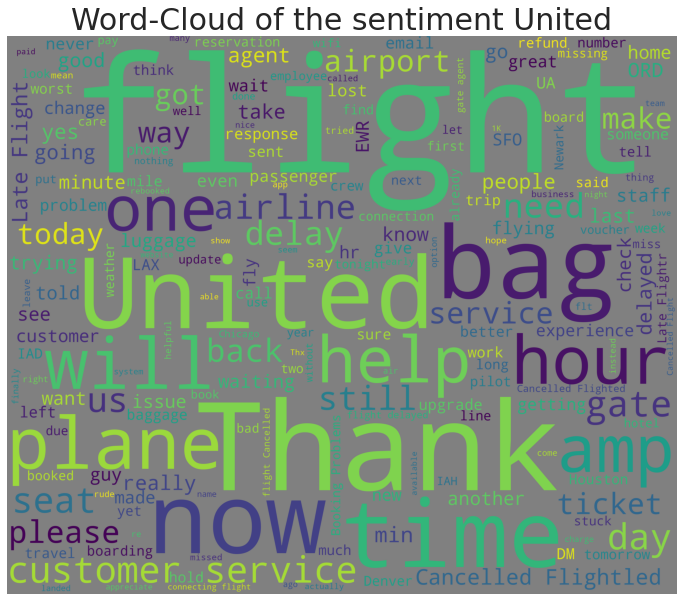

============================== US Airways


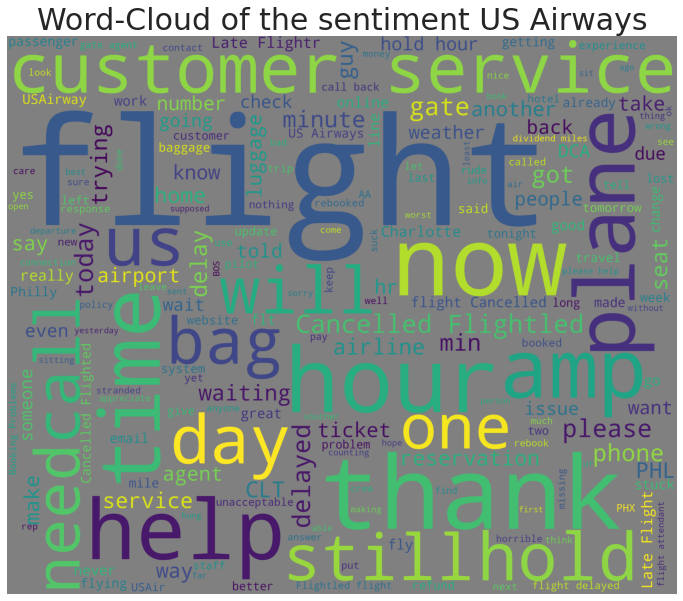

============================== American


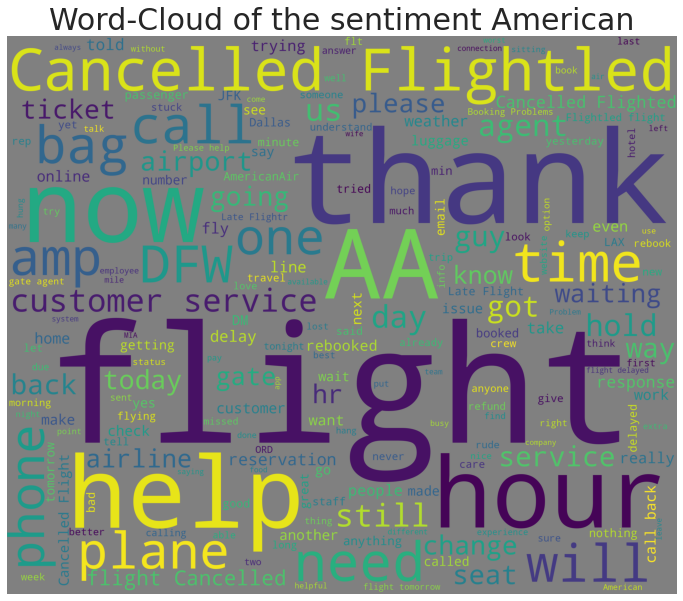

============================== Southwest


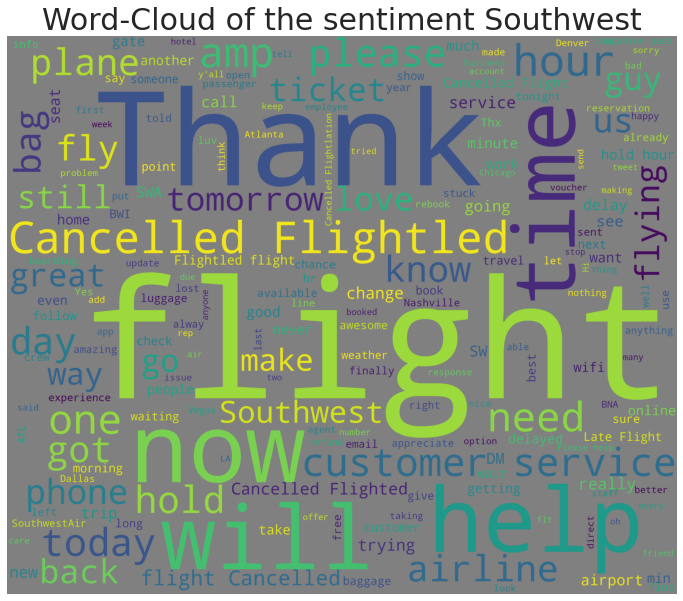

============================== Delta


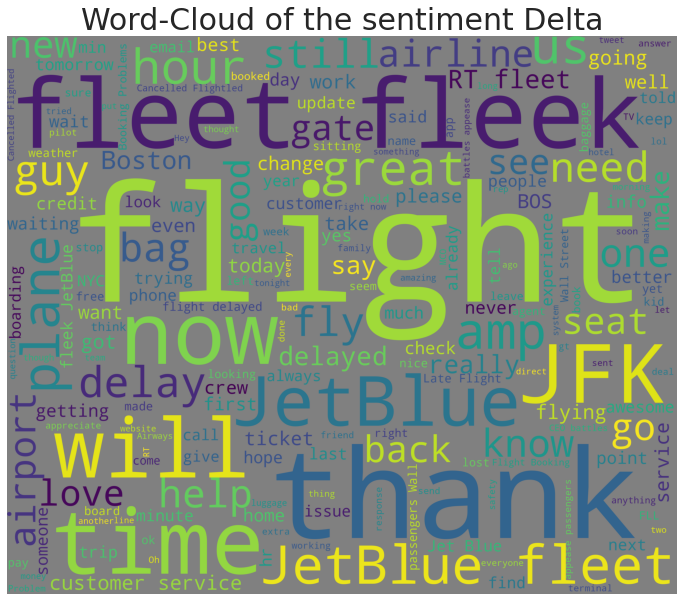

============================== Virgin America


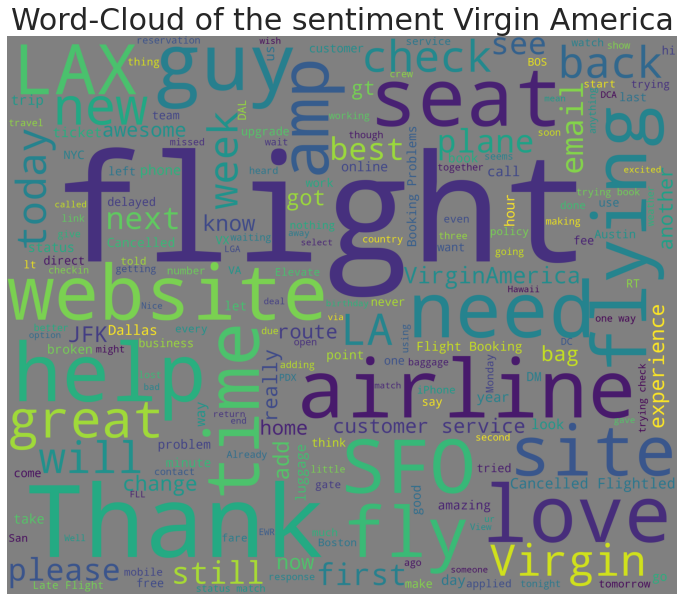

CPU times: user 2min 13s, sys: 1.2 s, total: 2min 14s
Wall time: 2min 14s


In [826]:
%%time
for col_value in list(df_tweets["airline"].value_counts().index):
  print("="*80)
  print("="*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='grey',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show() 

In [827]:
Categories_hour = df_tweets["tweet_created"].apply(lambda x : pd.Timestamp(x).hour)
Categories_hour

0        11
1        11
2        11
3        11
4        11
         ..
14635    12
14636    11
14637    11
14638    11
14639    11
Name: tweet_created, Length: 14640, dtype: int64

In [828]:
Categories_hour = Categories_hour.value_counts().sort_index(ascending=False)
Categories_hour

23     193
22     292
21     430
20     602
19     675
18     751
17     754
16     734
15     788
14     927
13     900
12     824
11     986
10     962
9     1013
8      926
7      776
6      621
5      477
4      368
3      225
2      174
1      111
0      131
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Proportion of tweets for each hour of the day')

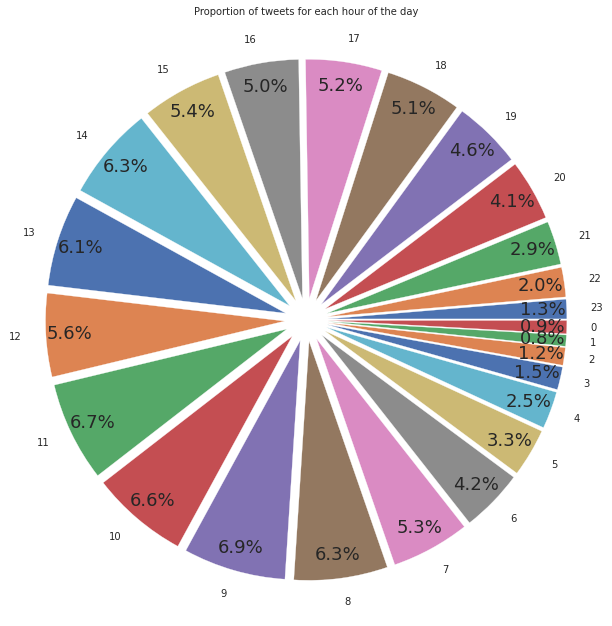

In [829]:
pie, ax = plt.subplots(figsize=[20,11])
# labels = Category.keys()
plt.pie(x=Categories_hour, 
        autopct="%.1f%%", 
        explode=[0.09]*24, 
        labels=Categories_hour.keys(), 
        pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=10)

In [830]:
df_tweets["word_count"] = [len(t.split()) for t in df_tweets["text"]]
df_tweets["word_count"].describe().T

count   14,640.0000
mean        17.6534
std          6.8823
min          2.0000
25%         12.0000
50%         19.0000
75%         23.0000
max         36.0000
Name: word_count, dtype: float64

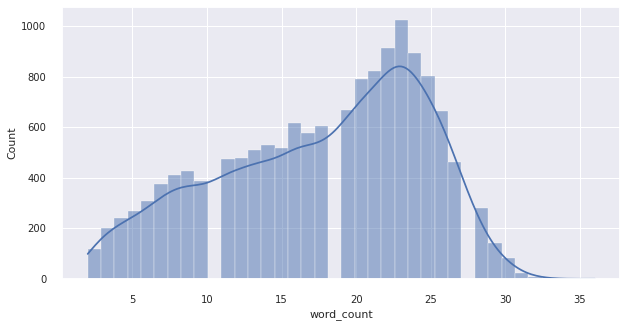

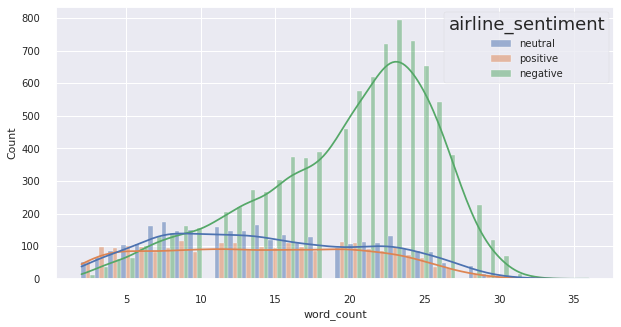

<Figure size 720x360 with 0 Axes>

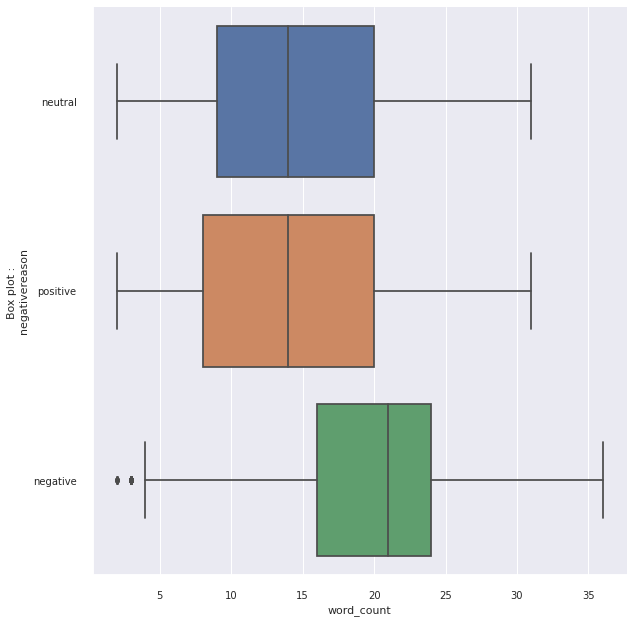

In [831]:
# distribution of data on word_count


plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="word_count", 
            height=9, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

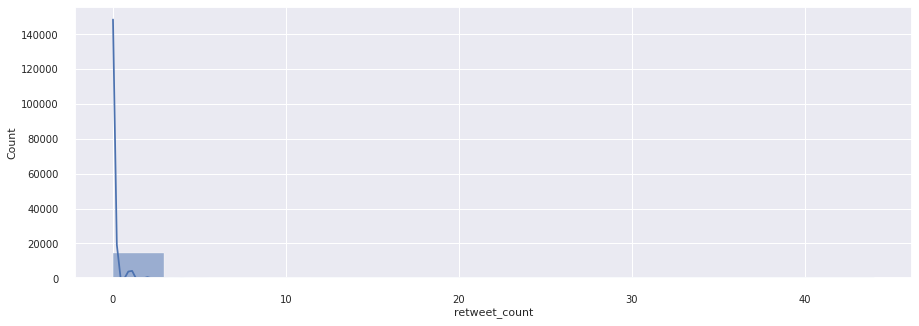

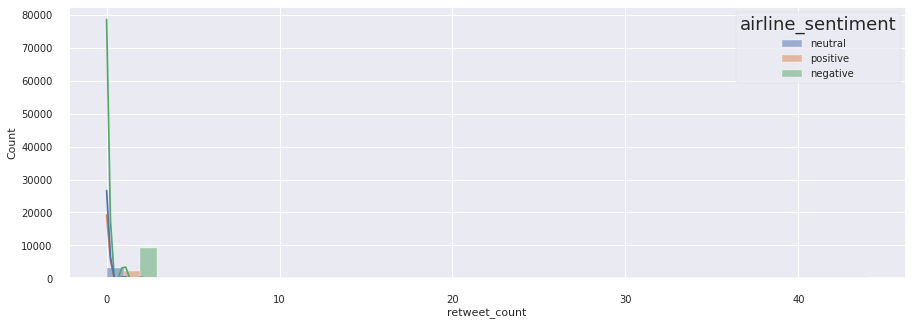

<Figure size 1080x360 with 0 Axes>

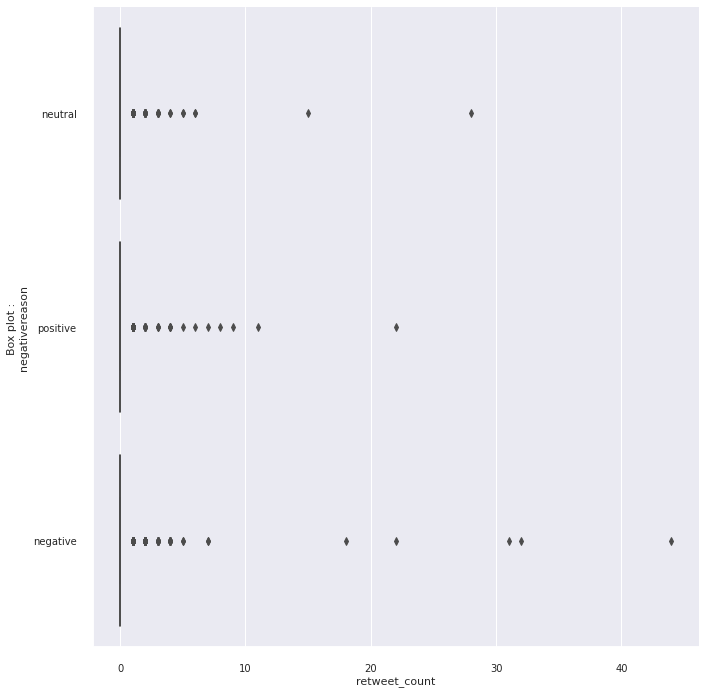

In [832]:
# distribution of data on retweet_count

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="retweet_count", 
            height=10, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

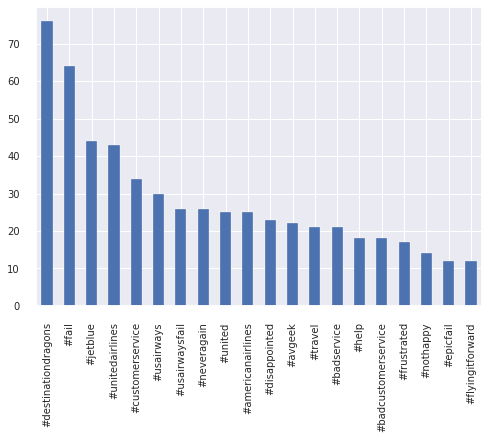

In [833]:
# top 20 occuring hashtags 
words = ' '.join(df_tweets['text'])

list_hashtags = [ x.lower() for x in words.split() if x.startswith("#")\
                    and x not in ["#"]]
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

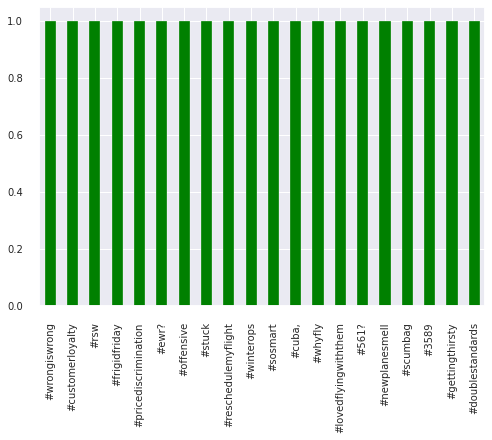

In [834]:
# rare 20 hashtags
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).tail(20).plot(kind="bar",
                                                            color="Green")

In [835]:
# all hashtags, including repeatitions
str_hashtags = " ".join(list_hashtags)
str_hashtags

'#fabulous #seductive #stress #29daystogo #fail #vx358 #noair #worstflightever #roasted #sfotobos #sendambien #andchexmix #moodlitmonday #sciencebehindtheexperience #moodlitmonday #travelhelp #elevategold #tribute #soundofmusic #oscars2015 #guiltypleasures #carrieunderwood #cmfat35000feet #neverflyvirginforbusiness #inflight #flightattendant #dreampath #neverflyvirgin #change #nomorevirgin #uncomfortable #sfo2lax #sneaky #customerservice #virginamerica #flying #sarcasm #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #phl #pleasecomeback #vabeatsjblue #oscars2015 #likingyoulessandless #oscars #redcarpet #oscars #oscars2015 #frustrated #lame #irmafromdallas #princesshalf #flight #dc #sunset #globe #backtowinter #work! #refreshed #redwineisbetter #emirates #baggageissues #smh #southwestair #flights #disappointed #elevate #gold #worst #flight #americanairlines #disappointed. #expected #beatstheothers #seriously #soreback #diehardv

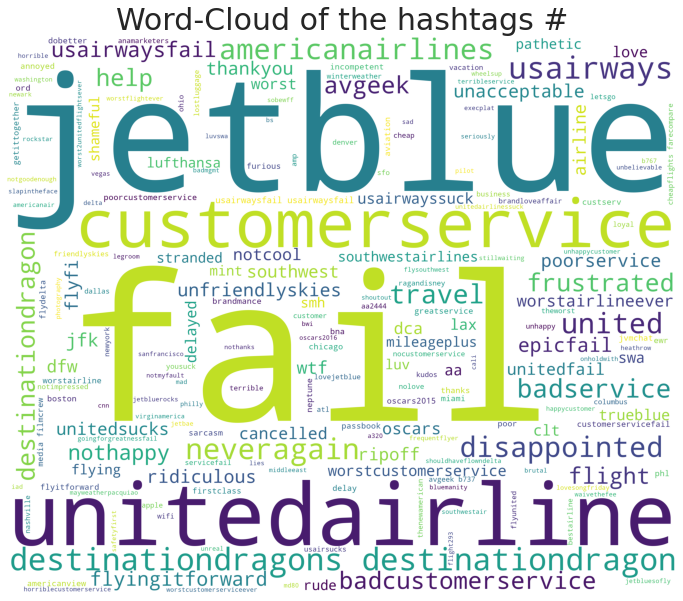

CPU times: user 19.6 s, sys: 149 ms, total: 19.8 s
Wall time: 19.7 s


In [836]:
%%time
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                    ).generate(str_hashtags)

plt.figure(1,figsize=(12, 12))
plt.title("Word-Cloud of the hashtags #",
          fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

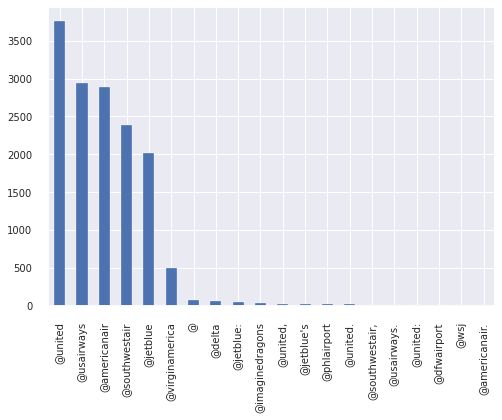

In [837]:
# top 20 occuring mentions  
# words = ' '.join(df_tweets['text'])

list_mentions = [ x.lower() for x in words.split() if x.startswith("@")]
pd.Series(list_mentions, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

# 3. Data Pre-Processing

The "text" feature would be used for Sentiment analysis on target variable "airline_sentiment"


From Rubiric,

Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

In [838]:
# make a copy of dataset, 
# keeping only relevant features containing information 
df_data = df_tweets[["text","airline_sentiment"]]
df_data

text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  
0       neutral          
1      positive          
2       neutral          
3      negative          
4      negative          
...                 ...  
14635  positive          
14636  negative          
14637   neutral          
14638  negative          
14639   neutral          

[14640 rows x 2 columns]

In [839]:
df_data.sample(20)

text                                                                                                                                           \
9143                             @USAirways thank you for reaching out to me. Hopefully my request will be fixed and I can remain a loyal customer.   
8834                                                                                        @JetBlue Call me when you do and we’ll have to hook up!   
1007                       @united my flight was delayed due to maintenance in LIT and caused me to miss my connection at IAH to MSY. Can you help?   
5648   @SouthwestAir If there are any Imagine Dragons tickets left for tomorrow at \n@VelourLive here in Utah I would love to go I am available! :)   
12516                                             @AmericanAir they are giving cots to the people that did not get hotel rooms...that is terrible..   
862                                                                                                @united Been trying since 1230 to file a report.   
4434             @SouthwestAir mins and no answer. My wife and baby need to get on that flight. She arrived 2 hrs prior. Please help. Venetia Crook   
13980  @AmericanAir gotta be worse than @delta w/ on time departures.  I rushed back to terminal C for 8:25 flight but they haven't strtd boarding.   
2113                                                                                                                              @united just DM'd   
5464       @SouthwestAir is making dreams come true with their #DestinationDragons scavenger hunt! You can win a chance to see Imagine Dragons! Go!   
12713   @AmericanAir thanks to your attendant on flight for advising connect flight held.  Ran with kids and flight departed. Poor service at Miami   
98                                                   @virginamerica What is your phone number. I can't find who to call about a flight reservation.   
12379                                                                                         @AmericanAir I lost my (basket) ballbag on your plane   
1659                                                                 @united We waited 40 min for our bags after a 45 min flight #nomorecheckedbags   
2917                                                                                     @united your website is a complete joke when using safari!   
12996                                                                                                        @AmericanAir thanks. Delivery status??   
1371                            @United so you jacked out my cousins trip to Portland and then Cancelled Flightled her return trip?! No more United   
8982                @USAirways will you be issuing a travel advisory for CLT for Thursday?  A significant snow storm is in the way Wednesday night.   
13856                                                                          @AmericanAir #AmericanView Sweet Home Chicago http://t.co/J6icLV8DTs   
4051     @united - thanks for the rude customer service and 3 hour delay. It really helped me timing wise for my afternoon meetings. Hello @Delta !   

      airline_sentiment  
9143   negative          
8834    neutral          
1007   negative          
5648    neutral          
12516  negative          
862    negative          
4434   negative          
13980  negative          
2113   negative          
5464   positive          
12713  negative          
98     negative          
12379  negative          
1659   negative          
2917   negative          
12996  positive          
1371   negative          
8982    neutral          
13856  positive          
4051   negative

### Observation by Sanjib:

Following pre-processing of text are required:


1. Replace contractions in string (e.g. replace "I'm" with "I am")

2. Remove : (They do not contribute to sentiments)

  2.1 Remove HTML Tags.
  
  2.2 Remove numbers.

  2.3 Remove tags starting with '@', '$'. 
  
  (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

  2.4 Removal of URL’s.

  2.5 Removal of Punctuations.
  

3. Replacement:

  3.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
   
  3.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  
  
4. Removal of non-ASCII characters.
    
5. Conversion of all characters to lowercase.

6. Tokenize text. Remove Stopwords. Before removing shortlist the stopwords that are meaningful to determine sentiment.

7. Spelling Correction. (Note: Tweets have usually spelling mistakes)

8. Lemmatize text. (preffered over stemming)



## 3.1 Toeknization

Followed by WordCloud Visualization

In [840]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [841]:
nltk.word_tokenize(
    "I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	")

# df_clean_tweet['clean_text'] = df_clean_tweet.apply(lambda row: nltk.word_tokenize(row['clean_text']), 
#                                                  axis=1) # Tokenization of data
# df_clean_tweet                                                 

['I',
 "'ve",
 'tried',
 'both',
 'desktop',
 'and',
 'mobile',
 ',',
 ':',
 '-',
 '(',
 ')',
 'http',
 ':',
 '//t.co/AvyqdMpi1Y',
 '.',
 'negative',
 '😭😭']

### Observation by Sanjib:

  1. The tokenization breaks an URL. Entire URL needs to be removed, because URL contains no information regarding sentiment classification.

  For the time being, we'll proceed with normalization only, as follows.



## 3.2 Normalization

In [842]:
%%time

# Spelling Correction: unit testing the libray with one smaple, 
str(TextBlob(
"I'll book my next Christmas vacatinn this Deceber any other ways you want to devalue mileage plus."
).correct())


CPU times: user 340 ms, sys: 0 ns, total: 340 ms
Wall time: 339 ms


"I'll book my next Christmas vacation this December any other ways you want to value mileage plus."

###Observation by Sanjib:

  1. The spelling check operation comsumes significant time. This needs to be performed after words are removed.

In [843]:
# emoji
%%time
# import emoji
emoji.demojize("united :-( customer service 👎", delimiters=("",""))

CPU times: user 329 µs, sys: 0 ns, total: 329 µs
Wall time: 335 µs


'united :-( customer service thumbs_down'

In [844]:
%%time 
text = "@United I am delighted ✈️ 😃 👍"
print (emoji.demojize( text,  delimiters=("","")) )

@United I am delighted airplane grinning_face_with_big_eyes thumbs_up
CPU times: user 351 µs, sys: 39 µs, total: 390 µs
Wall time: 358 µs


In [845]:
%%time
def replace_emojicons(str_p : str):
    """
      Desc: Replace following emoticons with meaningful
            words - happy, disgusting, surprise  
      Params:
        str_p : str = string where to replace
      Returns:
        str = string after replace
    """    
    # start_time = datetime.now()

    ##
    for ch in [":)", ":):)", ":-)", ":-))", ":-3", ":3"
               ":-{)", ":-):-)", ":-]", ":->", ":>", "8)",
               "8-)", ":-}", ":}", ":o)", "=3", "B^D", 
               ":c)", "c:", ":c)" "C:", ":^)", "=]", "=)",
               ";D", ";>", ";)", ";-)", ";]", ";-]", ";>",
               "O:-)", "O:)", "0:-3", "0:)", "0:-)", "0:)",
               "(^_^)/", "(^O^)／", "(＾ｖ＾)", ";p"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " happy " )

        

    ##
    for ch in [":(", ":(:(", ":-(", ":-c", ":c", ":-<", 
               ":<", ":-[", ":[", ":-[", ":-||", ">:[",  
               ":-{(", ":-(:-(", ":{", ":@", ";(", ":'(",
               ":'-(", ":=(", "D-'", "D:<", "D:", "D8",
               "D;", "D=", "DX", ":S", ":-/", ":/", ">:\\",
               ">:/", ":L", "8====D", "</3", "<\3", "8-X",
               "8=X", "x-3", "x=3"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " disgusting " )

    ##
    for ch in [":O", ":-O", ":o", ":-o", "8-0", ">:O",
               ":0", ":-0", "(@_@)", "(*_*)"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " surprise " )

    # print("replace_emojicons() duration {}".format(
    # datetime.now() - start_time))      

    return str_p


 # unit testing 
replace_emojicons("united :-( customer service 👎")


CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 18.8 µs


In [846]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [847]:
%%time

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
              "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
stopwords.append("w/")     

lemmatizer = WordNetLemmatizer()



############################################
def lemmatize_list(words):
    """Lemmatize"""
    # start_time = datetime.now()   
    # new_words = []
    # for word in words.split():
    #   new_words.append(" ")
    #   new_words.append(lemmatizer.lemmatize(word, pos='v'))

    new_words = [lemmatizer.lemmatize(word, 
                      pos='v') for word in words.split()]
 
    # print("lemmatize_list() duration = {}".format(
    #   datetime.now() - start_time))     
    return " ".join(new_words)

# Examples : Unit testing
text = "Couldn't make changes online and after 90 mins on hold and time" +\
" dealing w/ the rude rep, the 24 hour window has closed."
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )



Testing lemmatize_list : Couldn't make change online and after 90 mins on hold and time deal w/ the rude rep, the 24 hour window have closed.
CPU times: user 343 µs, sys: 38 µs, total: 381 µs
Wall time: 320 µs


In [848]:
%%time

# Examples : Unit testing
text = "@united I had one interview I was the last person what does that mean?"
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )

Testing lemmatize_list : @united I have one interview I be the last person what do that mean?
CPU times: user 480 µs, sys: 0 ns, total: 480 µs
Wall time: 410 µs


In [849]:
%%time 
text = "united :-( customer service 👎. I am disappointed"
unicodedata.normalize('NFKD', text).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 16.5 µs


In [850]:
%%time

############################################
def strip_html(text):
    # start_time = datetime.now()
    soup = BeautifulSoup(text, "html.parser")  
    # print("remove_numbers duration {}".format(
    # datetime.now() - start_time))                  
    return soup.get_text()

# Examples : Unit testing
text = "<h1>This is my website</h1>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my website
CPU times: user 412 µs, sys: 45 µs, total: 457 µs
Wall time: 466 µs


In [851]:
%%time

# Examples : Unit testing
text = "<h1>This is my website</h1><h2>Details here</h2>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my websiteDetails here
CPU times: user 322 µs, sys: 35 µs, total: 357 µs
Wall time: 315 µs


In [852]:


############################################

def remove_numbers(text):
  #remove the numericals present in the text
  # start_time = datetime.now()
  text = re.sub(r'\d+', '', text)
  # print("remove_numbers duration {}".format(
  #     datetime.now() - start_time))
  return text

# Examples : Unit testing
text = "@united A change fee of $200. Same exact flight from ATL-HOU is " +\
"$165. Why a charge of $574? The math doesn't add up."
print("Testing remove_numbers :" ,remove_numbers(text) )

############################################
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # start_time = datetime.now()

    new_words = unicodedata.normalize('NFKD', 
                      words).encode('ascii', 
                                  'ignore').decode('utf-8', 'ignore')
    # print("remove_non_ascii() duration = {}".format(
    # datetime.now() - start_time))  
    return new_words

# Examples : Unit testing
text = "united :-( customer service 👎"
print("Testing remove_non_ascii() :" ,
      remove_non_ascii(text) )

############################################
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words.split():
#         new_words.append(" ")
#         new_word = word.lower()
#         new_words.append(new_word)
#     return "".join(new_words)

    
# # Examples : Unit testing
# text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
# print("Testing to_lowercase :" ,
#       to_lowercase(text) )

############################################
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    # start_time = datetime.now()
    new_words = []
    # for word in words.split():
        # as tweets may not have whitespace along with punctuations always,
        # we are going to add whitespace in place of punctuations 
    new_words = re.sub(r'[^\w\s]', ' ', words)
        # if new_word != ' ':
        #     new_words.append(" ")
        #     new_words.append(new_word)
    # print("remove_punctuation() duration = {}".format(
    # datetime.now() - start_time)) 
    return new_words

# Examples : Unit testing
text = "@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable."
print("Testing remove_punctuation() :" ,
      "".join(remove_punctuation(text)) )    

############################################
def remove_stopwords_lower(words):
    """Remove stop words from list of tokenized words"""
    # start_time = datetime.now()

    # new_words = []
    # for word in words.split():
    #     if word not in stopwords:
    #         new_words.append(" ")
    #         new_words.append(word)
    new_words = [word.lower() for word in words.split() \
                    if word not in stopwords]

    # print("remove_stopwords() duration = {}".format(
    # datetime.now() - start_time))         
    return " ".join(new_words)

# Examples : Unit testing
text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
print("Testing remove_stopwords_lower :" ,
      "".join(remove_stopwords_lower(text)) )



############################################
# # Function for url's
# def remove_urls(text):
#     # url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     # return url_pattern.sub(r'', text)
#     start_time = datetime.now()
#     text = re.sub(
#     'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
#     '',text)
#     print("remove_urls() duration = {}".format(
#       datetime.now() - start_time))
#     return text

# # Examples : Unit testing
# text = "This is my website. Website is https://to.abc.com"
# print("Testing remove_urls() :" ,remove_urls(text) )


############################################

#expand the contractions

# def replace_contractions(text):
#     """Replace contractions in string of text"""
#     return contractions.fix(text)

# Examples : Unit testing
text = "Couldn't make changes online"
print("Testing replace_contractions :" ,
      contractions.fix(text) )


Testing remove_numbers : @united A change fee of $. Same exact flight from ATL-HOU is $. Why a charge of $? The math doesn't add up.
Testing remove_non_ascii() : united :-( customer service 
Testing remove_punctuation() :  united WTF     Delay after delay  15 hours YVR to SAN  Unacceptable 
Testing remove_stopwords_lower : flight crew availability blame? never again @united.
Testing replace_contractions : could not make changes online


In [853]:
%%time
############################################


def remove_mention_number_dollar_url(text_p : str):
    """
      Description: 
        remove the followings in the tweets
        mention, decimal, integer, dollar-currency, 
        URL, punctuation
    """
    # start_time = datetime.now()

    text_p = re.sub(
    r'@\w+|\d+(\.\d*)?|\$|http[s]?://(?:' +\
    '[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'+\
    '' #'|[^\w\s]' # removing punctuation removed emoji
    ,
    '',text_p)

    # print(
    # "remove_mention_number_dollar_url_punctuation() duration = {}".format(
    #   datetime.now() - start_time))
    return text_p

# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 281 µs, sys: 31 µs, total: 312 µs
Wall time: 248 µs


In [854]:
%%time
# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 359 µs, sys: 0 ns, total: 359 µs
Wall time: 317 µs


In [855]:
%%time
"Here are ABC.".lower()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


'here are abc.'

In [856]:
re.sub('[^\w\s]','',"thumbs_up") 

'thumbs_up'

In [857]:
%%time

############################################
def normalize(words):
    """
      Desc: 
        Wrapper function of all text pre-processing
      Params:
        words : str 
      Return:
        str = Cleaned Text  
    """

    """


    1. Replace contractions in string (e.g. replace "I'm" with "I am")

    2. Remove : (They do not contribute to sentiments)

      2.1 Remove HTML Tags.
      
      2.2 Remove numbers.

      2.3 Remove tags starting with '@', '$'. 
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      2.4 Removal of URL’s.

      2.5 Removal of Punctuation.
      

    3. Replacement:

      3.1 Spelling Correction. (Note: Tweets have )

      3.3 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      3.4 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    4. Removal of non-ASCII characters.
        
    5. Conversion of all characters to lowercase.

    6. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.

    7. Lemmatize text. (preffered over stemming)


    """

    strip_html



    words = remove_mention_number_dollar_url(words)
    
    # print(words)
    


    words = contractions.fix(words)
    # print(words)
    
    words = remove_stopwords_lower(words)
    # print(words)

    # words = remove_punctuation(words)
    # print(words)
    # words = remove_non_ascii(words)


    # words = to_lowercase(words)
    # words = words.lower()


    words = emoji.demojize(words, delimiters=(" "," "))
    words = replace_emojicons(words)
    # print(words)

    #remove punctuations
    words = re.sub('[^\w\s]','',words) 
    #remove non-ascii
    words = unicodedata.normalize('NFKD', words
          ).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

    # The spelling correction took long processing time
    # words = str(TextBlob(words).correct())

    words = lemmatize_list(words)
    return words

#Unit testing
print(normalize(
"I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 511 µs, sys: 56 µs, total: 567 µs
Wall time: 550 µs


In [858]:
%%time 
#Unit testing
print(normalize(
"I've tried both desktop and mobile, :( http://t.co/AvyqdMpi1Y	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 527 µs, sys: 0 ns, total: 527 µs
Wall time: 541 µs


In [859]:
%%time 

df_data["clean_text"] = df_data.apply(lambda row: normalize(row["text"]),
                                      axis=1)
df_data

CPU times: user 7.49 s, sys: 306 µs, total: 7.49 s
Wall time: 7.46 s


In [860]:
# %%time
# np.vectorize(normalize)(df_data["text"])

In [861]:
# save to disk
df_data.to_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv",index=True)

In [862]:
df_data.sample(20)

text                                                                                                                                                           \
2885                    @united Flight is awful only one lavatory functioning, and people lining up, bumping, etc. because can't use 1st class bathroom. Ridiculous   
10153                                                                                                                                        @USAirways u guys suck   
1520                      @united didn't realize my bag/ contents were wet until I got to my hotel. Sent my suit/shirts out to be dry cleaned. Mtgs start tomorrow.   
8838                                                                                                                           @JetBlue we don't need anybody else!   
842                                     @united Soooo, it's been 15 days and you've offered no response. So I assume poor treatment by gate agents is the norm now?   
5260                                                                                                          @SouthwestAir no. Told to call cust service on monday   
6571                                                                    @SouthwestAir where do we start? I've already wasted 1.5 hrs of phone wait time already :-(   
5257                                                                               @SouthwestAir   Where the heck are the bags for Chicago 408. It has been an hour   
30     @VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cause i entered my middle name during Flight Booking Problems 😢   
1308                    @united and after being on hold for an hour the day before to sort it out and being told it's fine it should be fine when you arrive to fly   
12734                            @AmericanAir #customerservice. Sitting on my fourth plane today with a mechanical problem. No excuses for this. Tough to be loyal.   
7766                                                          @JetBlue You guys need pillows on these rockers to really knock it out of the park ... just sayin ...   
5814                                         @SouthwestAir Is there any way to get entry to the Las Vegas event to see @Imaginedragons perform? #DestinationDragons   
5430                                                                                              @SouthwestAir I need your help but no one will pick up the phone.   
10673                                                                                                  @USAirways @stephenrodrick Your team needs to build capacity   
11317                  @USAirways It's not double booked. I spoke with CS and we've got a plan to fix this. It's still an amateur mistake that should never happen.   
4086                                                                                                                            @united can you not see the thread?   
6292                                                                                      @SouthwestAir #3854 ATL to RDU. Snow forecasted for Raleigh this evening.   
1137                   @united In 2015, United is "unable" to look up a flight reservation by passenger name at the YYZ check-in counter - WOW smh #customerservice   
13715                @AmericanAir flight from PHL to Austin Cancelled Flighted, headed to Houston, delayed, now have to pay to rent a car and drive 3 hrs to Austin   

      airline_sentiment  \
2885   negative           
10153  negative           
1520   negative           
8838   positive           
842    negative           
5260   negative           
6571   negative           
5257   negative           
30     negative           
1308   negative           
12734  negative           
7766    neutral           
5814    neutral           
5430   negative           
10673  negative           
11317  negative           
4086   negative           
6292    neut

In [863]:
df_clean_tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv")

In [864]:
df_clean_tweet

Unnamed: 0  \
0          0        
1          1        
2          2        
3          3        
4          4        
...           ...   
14635  14635        
14636  14636        
14637  14637        
14638  14638        
14639  14639        

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  \
0       neutral           
1      positive           
2       neutral           
3      negative           
4      negative           
...                 ...   
14635  positive           
14636  negative           
14637   neutral           
14638  negative           
14639   neutral           

      clean_text                                                                                     
0                                                                                          what say  
1                                                             plus add commercials experience tacky  
2                                                    i not today must mean i need take another trip  
3                   really aggressive blast obnoxious entertainment guests face amp little recourse  
4                                                                              really big bad thing  
...                                                                                             ...  
14635                                                            thank get different flight chicago  
14636  leave minutes late flight no warn communication minutes late flight call shitty customer svc  
14637                                                     please bring american airlines blackberry  
14638                        money change flight not answer phone any suggestions i make commitment  
14639                     ppl need know many seat next flight plz put us standby people next flight  

[14640 rows x 4 columns]

# 4. Feature Enggineering - Basic




## 4.1 Features of CountVectorizer 

In [865]:
# bow_vec1 = CountVectorizer()  
# data_features1 = bow_vec1.fit_transform(
#     df_clean_tweet['clean_text'])

# data_features1 = data_features1.toarray()                        # Convert the data features to array.
# data_features1.shape

In [866]:
# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features = data_features.toarray()  
data_features       

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [867]:
data_features.shape

(14640, 2000)

In [868]:
# summarize
print(bow_vec.vocabulary_)

{'what': 1924, 'say': 1527, 'plus': 1321, 'add': 24, 'experience': 620, 'not': 1174, 'today': 1776, 'must': 1135, 'mean': 1068, 'need': 1148, 'take': 1707, 'another': 90, 'trip': 1806, 'really': 1411, 'entertainment': 583, 'face': 634, 'amp': 81, 'little': 1005, 'big': 212, 'bad': 166, 'thing': 1744, 'seriously': 1552, 'would': 1968, 'pay': 1272, 'flight': 687, 'seat': 1536, 'play': 1316, 'fly': 703, 'va': 1870, 'yes': 1984, 'nearly': 1147, 'every': 600, 'time': 1769, 'vx': 1889, 'go': 765, 'away': 159, 'happy': 794, 'miss': 1109, 'opportunity': 1219, 'without': 1953, 'hat': 798, 'there': 1741, 'well': 1921, 'now': 1183, 'do': 528, 'amaze': 75, 'arrive': 119, 'hour': 841, 'early': 554, 'good': 769, 'me': 1065, 'know': 955, 'second': 1538, 'lead': 978, 'death': 462, 'among': 79, 'teens': 1720, 'lt': 1034, 'pretty': 1351, 'much': 1132, 'better': 208, 'this': 1748, 'great': 772, 'deal': 460, 'already': 69, 'think': 1746, 'nd': 1144, 'even': 596, 'st': 1645, 'yet': 1986, 'fabulous': 633, '

### Observation by Sanjib:

1. Apparaently the selected features do not have spelling mistakes.




## 4.2 Features of TF-IDF Vectorizer

In [869]:
# create the transform
tf_idf_vectorizer = TfidfVectorizer(max_features=2000)
# tokenize and build vocab
data_features_tf_idf = tf_idf_vectorizer.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features_tf_idf = data_features_tf_idf.toarray()

data_features_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [870]:
# summarize
data_features_tf_idf.shape

(14640, 2000)

In [871]:
# summarize
print(tf_idf_vectorizer.vocabulary_)
print(tf_idf_vectorizer.idf_)

{'what': 1924, 'say': 1527, 'plus': 1321, 'add': 24, 'experience': 620, 'not': 1174, 'today': 1776, 'must': 1135, 'mean': 1068, 'need': 1148, 'take': 1707, 'another': 90, 'trip': 1806, 'really': 1411, 'entertainment': 583, 'face': 634, 'amp': 81, 'little': 1005, 'big': 212, 'bad': 166, 'thing': 1744, 'seriously': 1552, 'would': 1968, 'pay': 1272, 'flight': 687, 'seat': 1536, 'play': 1316, 'fly': 703, 'va': 1870, 'yes': 1984, 'nearly': 1147, 'every': 600, 'time': 1769, 'vx': 1889, 'go': 765, 'away': 159, 'happy': 794, 'miss': 1109, 'opportunity': 1219, 'without': 1953, 'hat': 798, 'there': 1741, 'well': 1921, 'now': 1183, 'do': 528, 'amaze': 75, 'arrive': 119, 'hour': 841, 'early': 554, 'good': 769, 'me': 1065, 'know': 955, 'second': 1538, 'lead': 978, 'death': 462, 'among': 79, 'teens': 1720, 'lt': 1034, 'pretty': 1351, 'much': 1132, 'better': 208, 'this': 1748, 'great': 772, 'deal': 460, 'already': 69, 'think': 1746, 'nd': 1144, 'even': 596, 'st': 1645, 'yet': 1986, 'fabulous': 633, '

# 5. Data Split

Spilt the dataset into -

train :: test = 80 :: 20

Assumption : The cross-validation would be part of the algorithm  

In [872]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

y=df_clean_tweet["airline_sentiment"] 
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [873]:
# Encode classes into numbers
y = y.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: uint8

## 5.1 TF-IDF Features

In [874]:
%%time

# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame( data_features_tf_idf, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (11712, 2000)
X_test (2928, 2000)
y_train (11712,)
y_test (2928,)
CPU times: user 190 ms, sys: 5.21 ms, total: 195 ms
Wall time: 193 ms


In [875]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [876]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712 entries, 13285 to 5361
Columns: 2000 entries, 0 to 1999
dtypes: float16(2000)
memory usage: 44.8 MB


In [877]:
X_train.sample(10)

0      1      2      3      4      5      6      7      8      9      \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       10     11     12     13     14     15     16     17     18     19     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       20     21     22     23     24     25     26     27     28     29     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       30     31     32     33     34     35     36     37     38     39     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       40     41     42     43     44     45     46     47     48     49     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.2241 0.0000 0.0000 0.0000 0.0000 0.0000 0.000

In [878]:
y_train

13285    0
1040     0
8148     1
3671     0
5430     0
        ..
9552     0
4645     2
14124    0
13088    0
5361     0
Name: airline_sentiment, Length: 11712, dtype: uint8

In [879]:
# %%time

# # Split dataset into validation and test

# X_val, X_test, y_val, y_test = train_test_split(
#     X_test,
#     y_test, 
#     test_size=0.5, 
#     random_state=10,
#     stratify=y_test)


# print("X_val", X_val.shape)
# print("X_test", X_test.shape)
# print("y_val", y_val.shape)
# print("y_test", y_test.shape)

In [880]:
# # check if the distrution of target classes are preserved after dataset split

# print(y.value_counts(normalize=True))
# print("="*40)
# print(y_val.value_counts(normalize=True))
# print("="*40)
# print(y_test.value_counts(normalize=True))
# print("="*40)

## 5.2 Count Vectorizer (Bag of Words) Features

In [881]:
# Big of Word, Count Vectorizer

print(data_features.max(), data_features.min(), data_features.mean())

32 0 0.004294262295081968


In [882]:
data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [883]:
%%time

# Split dataset into train and test

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    pd.DataFrame( data_features, 
                 index=df_clean_tweet.index,
                 dtype="uint8"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_bow", X_train_bow.shape)
print("X_test_bow", X_test_bow.shape)
print("y_train_bow", y_train_bow.shape)
print("y_test_bow", y_test_bow.shape)

X_train_bow (11712, 2000)
X_test_bow (2928, 2000)
y_train_bow (11712,)
y_test_bow (2928,)
CPU times: user 46.3 ms, sys: 1.82 ms, total: 48.1 ms
Wall time: 47.2 ms


In [884]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_bow.value_counts(normalize=True))
print("="*40)
print(y_test_bow.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [885]:
X_train_bow.sample(10)

0     1     2     3     4     5     6     7     8     9     10    11    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       12    13    14    15    16    17    18    19    20    21    22    23    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     1     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       24    25    26    27    28    29    30    31    32    33    34    35    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   1     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       36    37    38    39    40    41    42    43    44    45    46    47    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       48    49    ...  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
7159   0     0     ...  0     0     0     0     0     0     0     0     0      
9173   0     0     ...  0     0     0     0     0     0     0     0     0      
5897   0     0     ...  0     0     0     0     0     0     0     0     0      
6503   0     0     ...  0     0     0     0     0     0     0     0     0      
2875   0     0     ...  0     0     0  

# 6. Build Model - Traditional RandomForest



## 6.1 Random Forest Model with TF-IDF features

In [886]:
rf_tf = RandomForestClassifier(
    random_state=10,
    n_estimators=10, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_tf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [887]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,18),
    "max_features": [0.6, 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_tf.fit(X_train, y_train) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj = RandomizedSearchCV(
            estimator=rf_tf, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj = randomCV_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_class_randomCV = randomCV_obj.best_estimator_

# Fit the best algorithm to the data.
rf_class_randomCV.fit(X_train, y_train)

CPU times: user 49.2 s, sys: 2.12 s, total: 51.3 s
Wall time: 6min 18s


In [888]:
rf_class_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.7,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [889]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False, desc=""
):
    """
    Description:
        Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    Parameters:
        desc: a description that would be added to the output result
        model: classifier to predict values of X
        train, test: Independent features
        train_y,test_y: Dependent variable
        threshold: thresold for classifiying the observation as 1
        flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
        roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    Returns:
        list with train and test scores
    """

    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) 
    # print(pred_train)
    # > threshold  # predict_proba
    pred_test = model.predict(test)
    # print(pred_test) 
    # > threshold

    # pred_train = np.round(pred_train)
    # pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train, average='weighted')
    test_recall = recall_score(test_y, pred_test, average='weighted')

    train_precision = \
      precision_score(train_y, pred_train, average='weighted')
    test_precision = \
      precision_score(test_y, pred_test, average='weighted')

    train_f1 = f1_score(train_y, pred_train, average='weighted')
    test_f1 = f1_score(test_y, pred_test, average='weighted')

    # *********************************************************
    # NOTE : Because Average is chosen as "weighted", 
    # Accuracy-Test == Recall-Test
    # *********************************************************

    df_score = pd.DataFrame(dtype="float16")

    df_score["Description"] = (desc,)
    # df_score["Threshold"] = (threshold,)
    df_score["Accuracy-Train"] = (train_acc,)
    df_score["Accuracy-Test"] = (test_acc,)
    df_score["Precision-Train"] = (train_precision,)
    df_score["Precision-Test"] = (test_precision,)
    df_score["Recall-Train"] = (train_recall,)
    df_score["Recall-Test"] = (test_recall,)
    df_score["F1-Train"] = (train_f1,)
    df_score["F1-Test"] = (test_f1,)
    # df_score["ROC-AUC-Train"] = (np.nan,)
    # df_score["ROC-AUC-Test"] = np.nan

    # if roc == True:  # calculate ROC-AUC if flag is true
    #     pred_train_prob = model.predict(train)  # predict_proba
    #     pred_test_prob = model.predict(test)
    #     df_score.at[0, "ROC-AUC-Train"] = roc_auc_score(
    #         train_y, pred_train, average="weighted", multi_class='raise')
    #     df_score.at[0, "ROC-AUC-Test"] = roc_auc_score(
    #         test_y, pred_test, average="weighted", multi_class='raise')

    if flag == True:
        print(df_score)

    return df_score



def make_confusion_matrix(model, X_test, y_test,
            # history, 
            desc="", CATEGORIES=[0,1,2]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
      y_test,
      model.predict(X_test)
            )
  # print(cf_matrix)
  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, annot=True,
              cmap="YlGnBu", fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title(desc)
  # sns.set_context("notebook")  # talk : bolds the plots

  # return pd.DataFrame( {"Description": desc, 
  #                       "Accuracy-Train": accuracy_train,
  #                       "Accuracy-Validation": accuracy_val,
  #                       "Accuracy-Test": accuracy_test,
  #                       "Recall-Test": recall_test,
  #                       "Precision-test" : precision_test,
  #                       "F1-Test": f1_test
  #                       },
  #                     index=[0] )




In [890]:
#test dataset is unseen

df_score_rf_randomCV = get_metrics_score(
    rf_class_randomCV,
    X_train,
    X_test,  # unseen data
    y_train,
    y_test,  # unseen data
    desc="RandomForest TF-IDF",
    roc=True,
)

  Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6401          0.6475         0.7438             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7465          0.6401        0.6475       0.6622    0.6693    


In [891]:
df_score_rf_randomCV 


Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.6401          0.6475         0.7438             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7465          0.6401        0.6475       0.6622    0.6693

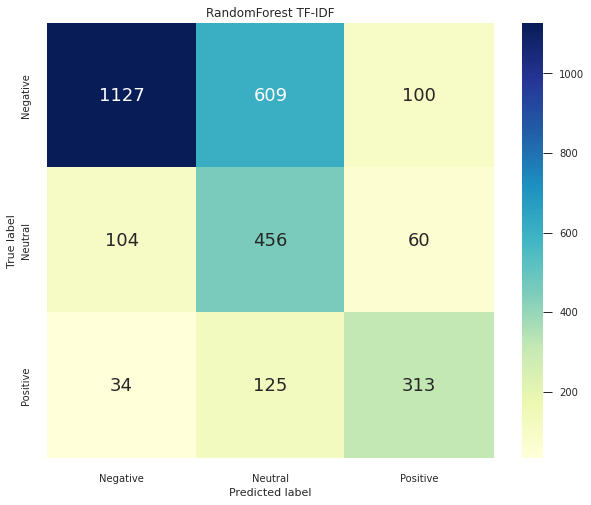

In [892]:
make_confusion_matrix(rf_class_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest TF-IDF",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [893]:
rf_class_randomCV.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [894]:
tf_idf_vectorizer.get_feature_names()

['aa',
 'aadvantage',
 'able',
 'about',
 'abq',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'accommodations',
 'accord',
 'account',
 'acct',
 'accurate',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admirals',
 'admit',
 'adopt',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'affect',
 'afford',
 'after',
 'afternoon',
 'again',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahold',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'albany',
 'alert',
 'alist',
 'all',
 'alliance',
 'allow',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'also',
 'alternate',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americanairlines',
 'among',
 'amount',
 'amp',
 'an',
 'and',
 'angry',
 'anniversary',
 'announce',
 'announcement',
 'ann

In [895]:
# re-usable function


def feature_importance_in_tree(dTree, 
                               vectorizer,
                               feature_names=[], 
                               no_top_features=20,
                               model_name=""):
    """
    Description:
        Display importance of features in the tree building , by Gini importance
    Parameters:
        dTree : Descision Tree Model
        feature_names : list of independent variable names
    Returns:
        dataframe containing the feature importance, sorted decending
    """

    df_imp = pd.DataFrame(
        dTree.feature_importances_,
        columns=["Importance"],
        index=feature_names,
    ).sort_values(by="Importance", ascending=False)

    df_imp = df_imp.head( no_top_features )

    names = vectorizer.get_feature_names()
    # count = 0
    names_dict = {}
    for i in np.arange(0,len(names)):
      # print(names[i])
      names_dict[i] = names[i]

    # print(names_dict)

    df_imp["Feature"]= df_imp.index.map(names_dict)

    print(df_imp)

    # sns.set_context("talk")  # talk : bolds the plots

    print("*"*60)
    print("The plot of Feature Importance, top", 
          str(no_top_features))

    # fig, axs = plt.subplots(figsize=(20, 5))
    # df_imp.plot(kind="bar", ax=axs, color="Green")
    # plt.title("Feature Importances")
    # plt.xlabel("Relative Importance")
    sns.catplot(
        data=df_imp,
        y="Feature",
        x="Importance",
        kind="bar",
        height=10
    )
    plt.show()

    # sns.set_context("notebook")  # reset to normal

    wordcloud = WordCloud(
                      background_color='grey',
                      width=2000,
                      height=1500,
    ).generate(" ".join(df_imp["Feature"]))

    print("*"*60)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(1, figsize=(20, 15))
    plt.title('Top '+ str(no_top_features) +\
              ' features WordCloud', fontsize=30)
    plt.axis("off")
    plt.show()              

    return df_imp




      Importance Feature    
1734 0.3390            thank
1174 0.0903              not
772  0.0584            great
1028 0.0441             love
473  0.0373            delay
824  0.0325             hold
794  0.0324            happy
842  0.0280            hours
273  0.0265           cancel
1890 0.0191             wait
275  0.0170           cannot
436  0.0162         customer
160  0.0147          awesome
75   0.0144            amaze
206  0.0135             best
816  0.0109               hi
268  0.0108             call
1964 0.0084            worst
769  0.0084             good
1021 0.0083             lose
172  0.0070              bag
1555 0.0059          service
421  0.0055             crew
53   0.0052          airline
1318 0.0048           please
190  0.0046               be
110  0.0046       appreciate
271  0.0044              can
1109 0.0042             miss
1989 0.0041              you
525  0.0038               dm
955  0.0037             know
1968 0.0035            would
1865 0.0032   

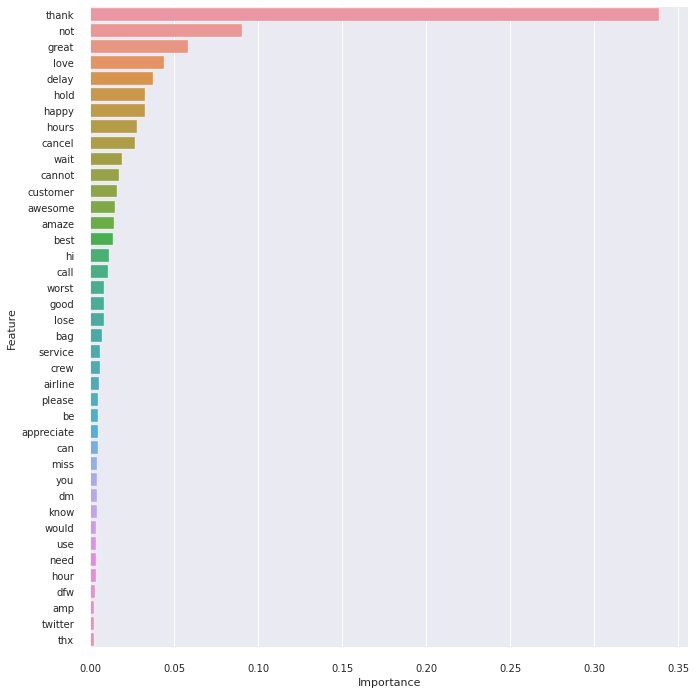

************************************************************


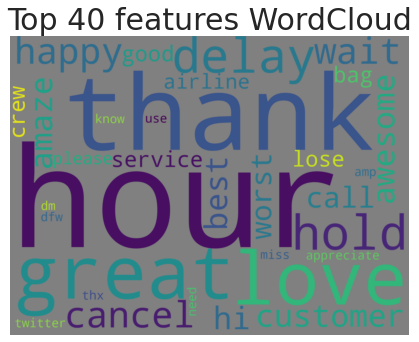

In [896]:
df_imp = feature_importance_in_tree(
    dTree=rf_class_randomCV, 
    vectorizer=tf_idf_vectorizer,
    feature_names=X_train.columns, 
    no_top_features = 40,
    model_name="RandomForest TF-IDF"
)

In [897]:
df_imp

Importance Feature    
1734 0.3390            thank
1174 0.0903              not
772  0.0584            great
1028 0.0441             love
473  0.0373            delay
824  0.0325             hold
794  0.0324            happy
842  0.0280            hours
273  0.0265           cancel
1890 0.0191             wait
275  0.0170           cannot
436  0.0162         customer
160  0.0147          awesome
75   0.0144            amaze
206  0.0135             best
816  0.0109               hi
268  0.0108             call
1964 0.0084            worst
769  0.0084             good
1021 0.0083             lose
172  0.0070              bag
1555 0.0059          service
421  0.0055             crew
53   0.0052          airline
1318 0.0048           please
190  0.0046               be
110  0.0046       appreciate
271  0.0044              can
1109 0.0042             miss
1989 0.0041              you
525  0.0038               dm
955  0.0037             know
1968 0.0035            would
1865 0.0032              use
1148 0.0032             need
841  0.0031             hour
498  0.0027              dfw
81   0.0022              amp
1823 0.0021          twitter
1763 0.0020              thx

## 6.2 Random Forest Model with Count Vectorizer (Bag of Words) features

In [898]:
rf_bow = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_bow.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [899]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,22),
    "max_features": [ 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [ 10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_bow.fit(X_train_bow, y_train_bow) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)


# Run the Randomized search
randomCV_obj_bow = RandomizedSearchCV(
            estimator=rf_bow, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj_bow = randomCV_obj_bow.fit(X_train_bow, 
                                        y_train_bow)

# Set the clf to the best combination of parameters
rf_bow_randomCV = randomCV_obj_bow.best_estimator_

# Fit the best algorithm to the data.
rf_bow_randomCV.fit(X_train_bow, y_train_bow)

CPU times: user 2min 6s, sys: 2.47 s, total: 2min 9s
Wall time: 9min 36s


In [900]:
rf_bow_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 0.7,
 'max_leaf_nodes': None,
 'max_samples': 0.9,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [901]:
#test dataset is unseen

df_score_rf_bow_randomCV = get_metrics_score(
    rf_bow_randomCV,
    X_train_bow,
    X_test_bow,  # unseen data
    y_train_bow,
    y_test_bow,  # unseen data
    desc="RandomForest BOW",
    # roc=True,
)

  Description        Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest BOW 0.7018          0.6728         0.7999             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7561          0.7018        0.6728       0.7214    0.6927    


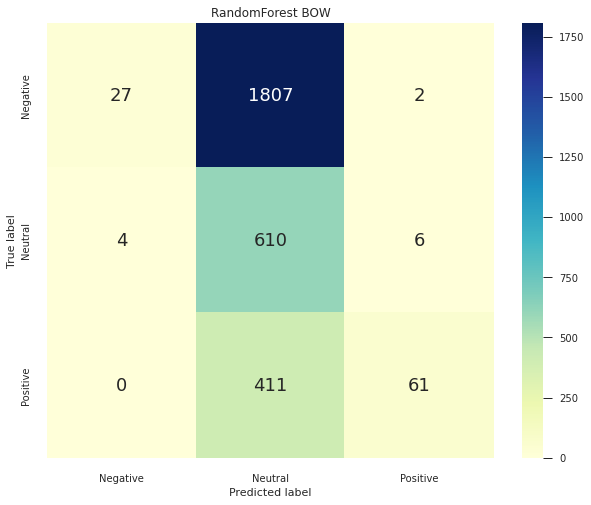

In [902]:
make_confusion_matrix(rf_bow_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest BOW",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [903]:
df_scores = pd.concat([df_score_rf_randomCV, df_score_rf_bow_randomCV],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
1     RandomForest BOW 0.7018          0.6728         0.7999             
0  RandomForest TF-IDF 0.6401          0.6475         0.7438             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
1 0.7561          0.7018        0.6728       0.7214    0.6927    
0 0.7465          0.6401        0.6475       0.6622    0.6693

      Importance Feature    
1734 0.2227            thank
1174 0.0627              not
772  0.0414            great
1028 0.0319             love
473  0.0261            delay
824  0.0248             hold
794  0.0239            happy
842  0.0189            hours
273  0.0188           cancel
1890 0.0155             wait
75   0.0130            amaze
436  0.0129         customer
275  0.0124           cannot
206  0.0120             best
160  0.0113          awesome
1964 0.0089            worst
268  0.0081             call
816  0.0081               hi
769  0.0078             good
1968 0.0071            would
172  0.0060              bag
1021 0.0059             lose
687  0.0057           flight
271  0.0055              can
1151 0.0054            never
1989 0.0052              you
1318 0.0045           please
1555 0.0044          service
1780 0.0040         tomorrow
1109 0.0040             miss
841  0.0038             hour
190  0.0038               be
525  0.0037               dm
110  0.0037   

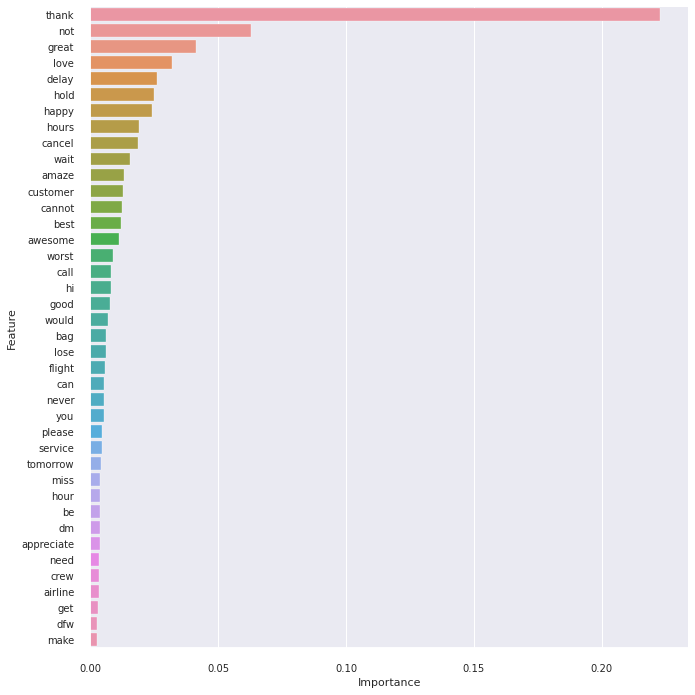

************************************************************


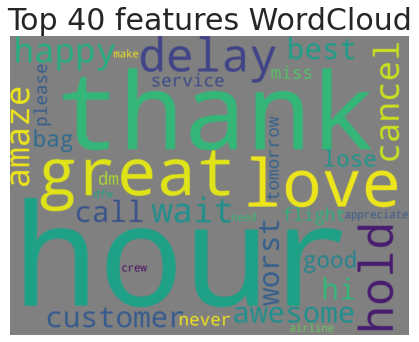

In [904]:
df_imp = feature_importance_in_tree(
    dTree=rf_bow_randomCV, 
    vectorizer=bow_vec,
    feature_names=X_train_bow.columns, 
    no_top_features = 40,
    model_name="RandomForest BOW"
)


In [905]:
df_imp

Importance Feature    
1734 0.2227            thank
1174 0.0627              not
772  0.0414            great
1028 0.0319             love
473  0.0261            delay
824  0.0248             hold
794  0.0239            happy
842  0.0189            hours
273  0.0188           cancel
1890 0.0155             wait
75   0.0130            amaze
436  0.0129         customer
275  0.0124           cannot
206  0.0120             best
160  0.0113          awesome
1964 0.0089            worst
268  0.0081             call
816  0.0081               hi
769  0.0078             good
1968 0.0071            would
172  0.0060              bag
1021 0.0059             lose
687  0.0057           flight
271  0.0055              can
1151 0.0054            never
1989 0.0052              you
1318 0.0045           please
1555 0.0044          service
1780 0.0040         tomorrow
1109 0.0040             miss
841  0.0038             hour
190  0.0038               be
525  0.0037               dm
110  0.0037       appreciate
1148 0.0035             need
421  0.0034             crew
53   0.0034          airline
757  0.0029              get
498  0.0026              dfw
1046 0.0024             make

# 7. Word2Vec Model

skip gram word vectorization.

The model taken into account sequence of words together, trying to understand the context of sentences.


In [906]:
%%time
# tokenize
clean_tweet_tokenized = \
    df_clean_tweet["clean_text"].apply(
        lambda x : str(x).split() 
    )

clean_tweet_tokenized

CPU times: user 19.1 ms, sys: 0 ns, total: 19.1 ms
Wall time: 18.7 ms


In [907]:
print(len(df_clean_tweet["clean_text"]),df_clean_tweet.shape[0])

14640 14640


In [908]:
%%time
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
# min_count: Ignores all words with total frequency lower than 2.  

model_w2v = Word2Vec(clean_tweet_tokenized, 
                 size= 200,
                 workers=2, # Google Colab
                 window =5, 
                 min_count=1, # Ignores all words with total frequency lower than 2.  
                 sg = 1)

model_w2v.train(clean_tweet_tokenized,
                total_examples = df_clean_tweet.shape[0],
                epochs=20)

CPU times: user 23.9 s, sys: 0 ns, total: 23.9 s
Wall time: 13.5 s


In [909]:
model_w2v.wv.similarity('food','drink')

0.48244458

In [910]:
model_w2v.wv.similarity('obnoxious','bad')

0.35083467

In [911]:
model_w2v.wv.similarity('flight','airlines')

0.30020505

In [912]:
model_w2v.wv.similarity('ppl','people')

0.3782855

In [913]:
model_w2v.wv.similarity('hundred_points','happy')

0.2578886

In [914]:
model_w2v.most_similar("airlines")[:5]

[('pain', 0.5227248668670654),
 ('turkish', 0.5193297266960144),
 ('yours', 0.5179834365844727),
 ('american', 0.5136421918869019),
 ('greati', 0.5105805397033691)]

In [915]:
model_w2v.most_similar("happy")[:5]

[('nycgt', 0.4753877818584442),
 ('dx', 0.46375787258148193),
 ('justdoit', 0.4544743299484253),
 ('youknowyouwantto', 0.4536582827568054),
 ('smite', 0.4533309042453766)]

In [916]:
model_w2v.most_similar("bad")[:5]

[('impair', 0.5578600168228149),
 ('topdown', 0.5495984554290771),
 ('minutesi', 0.5404209494590759),
 ('senseless', 0.5386878848075867),
 ('amshould', 0.5386119484901428)]

In [917]:
model_w2v.most_similar("thank")[:5]

[('condolences', 0.6322195529937744),
 ('thanx', 0.6128914952278137),
 ('greatly', 0.6077765226364136),
 ('recovery', 0.606874942779541),
 ('jh', 0.6012750267982483)]

In [918]:
model_w2v.most_similar("delay")[:5]

[('aircrft', 0.5935896039009094),
 ('lag', 0.575556755065918),
 ('chuckhole', 0.5749077796936035),
 ('atc', 0.5743691921234131),
 ('todayall', 0.5695724487304688)]

## 7.1  Word2Vec Feature Enginerring



In [919]:

def word_vector(tokens, size):
    """
      Desc: 
        mean of all the word vectors present in the tweet
    """
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [920]:
# Note : following transformation of mean vector is taking place within
# each record, not influenced by another record, no chance of data-leakage

wordvec_arrays = np.zeros((df_clean_tweet.shape[0],
                           200)) 

for i in range(df_clean_tweet.shape[0]):
    wordvec_arrays[i,:] = word_vector(
        clean_tweet_tokenized[i], 
        200)
wordvec_df = pd.DataFrame(wordvec_arrays,
                          index=df_clean_tweet.index,)
wordvec_df.shape

(14640, 200)

## 7.2 Word2Vec Data Split

In [921]:
%%time

# Split dataset into train and test

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    pd.DataFrame( wordvec_df, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_w2v", X_train_w2v.shape)
print("X_test_w2v", X_test_w2v.shape)
print("y_train_w2v", y_train_w2v.shape)
print("y_test_w2v", y_test_w2v.shape)

X_train_w2v (11712, 200)
X_test_w2v (2928, 200)
y_train_w2v (11712,)
y_test_w2v (2928,)
CPU times: user 53.4 ms, sys: 622 µs, total: 54 ms
Wall time: 52.7 ms


In [922]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_w2v.value_counts(normalize=True))
print("="*40)
print(y_test_w2v.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [923]:
X_train_w2v.sample(10)

0       1      2       3       4       5       6      7       8       \
12582 -0.2394 0.0935 -0.1982 -0.2069 -0.2065 -0.0231 0.0136  0.0121 -0.0144   
6302   0.0381 0.1802 -0.1041 -0.2268  0.0108  0.2360 0.1561 -0.1948 -0.1456   
12696  0.0465 0.3259 -0.0715 -0.1294 -0.1152  0.0864 0.0192 -0.0207 -0.3330   
12995 -0.0764 0.0412 -0.2448 -0.1428 -0.1896 -0.0147 0.1176  0.0895 -0.0671   
207    0.0150 0.1871 -0.0729 -0.1137 -0.0601  0.0589 0.1160 -0.0446 -0.2059   
6512  -0.1196 0.2230 -0.0745 -0.0729 -0.1331  0.1556 0.0931  0.0624 -0.1102   
12147  0.0052 0.2198 -0.2162 -0.1659 -0.1876  0.2144 0.0252 -0.0430 -0.1869   
10982 -0.1322 0.0707 -0.1478 -0.0289 -0.2231  0.0079 0.1179 -0.1049 -0.1050   
7260  -0.1589 0.1283 -0.0783  0.1455 -0.3352  0.0506 0.2079 -0.0399 -0.1334   
8652  -0.1625 0.1124 -0.0677 -0.0087 -0.1215  0.0860 0.0091  0.1101 -0.2028   

       9       10     11     12      13      14     15      16      17      \
12582 -0.0241 0.1259 0.1509  0.0604 -0.0325 0.2578 -0.1431 -0.1095 -0.0706   
6302   0.0618 0.0552 0.1290 -0.3198  0.0977 0.3030 -0.2365 -0.0211 -0.1439   
12696  0.0558 0.1209 0.1116 -0.1759 -0.1212 0.2749 -0.0634 -0.1913 -0.1387   
12995 -0.0202 0.2429 0.0331  0.1201 -0.0074 0.4360  0.0641 -0.1549 -0.1622   
207    0.1736 0.2472 0.2964  0.1094  0.0304 0.4167  0.0317  0.1288 -0.2688   
6512  -0.0289 0.1515 0.2440  0.0391 -0.1223 0.4531 -0.0753 -0.0476 -0.1312   
12147 -0.1560 0.1370 0.1403  0.0366 -0.2625 0.5679  0.0422 -0.0756 -0.2900   
10982 -0.1107 0.2466 0.1777 -0.0222 -0.1743 0.4231  0.1230 -0.1155 -0.1306   
7260  -0.0055 0.2932 0.1454 -0.0352 -0.0003 0.3926 -0.0494 -0.3127 -0.0573   
8652  -0.0393 0.1735 0.1819  0.0838 -0.0679 0.1611 -0.0476 -0.0575 -0.0776   

       18      19      20      21      22      23      24      25      26     \
12582  0.0546  0.0799 -0.0443 -0.1002 -0.0465  0.1256  0.0115 -0.0555 0.2566   
6302   0.0967  0.0959  0.1836 -0.0961  0.0677  0.4377 -0.1987 -0.0167 0.3225   
12696  0.2336  0.1242 -0.1564 -0.0983 -0.0048  0.1076 -0.4705 -0.1268 0.2104   
12995 -0.0084  0.0134  0.0982 -0.1727 -0.0015 -0.0871 -0.0783 -0.0296 0.1470   
207   -0.0303  0.0134 -0.0331 -0.1786 -0.0244  0.0571 -0.1053  0.1366 0.0760   
6512   0.0107 -0.0029 -0.1963 -0.2759 -0.2874  0.0874 -0.1224 -0.0464 0.1802   
12147  0.2510  0.0620 -0.1594 -0.2881 -0.1606 -0.0493 -0.2128  0.0046 0.2620   
10982  0.1498  0.0604 -0.3132 -0.1688 -0.2269  0.1801 -0.1232 -0.0312 0.1855   
7260  -0.0244  0.0446 -0.0303 -0.2917 -0.0829  0.0411  0.0303  0.1181 0.1936   
8652  -0.0060  0.1425 -0.1033  0.0201 -0.0174  0.1334 -0.2443  0.0299 0.2573   

       27      28      29      30      31      32      33      34      35      \
12582  0.0196  0.1973 -0.1493 -0.0127  0.1428  0.1265 -0.3086  0.0020 -0.0811   
6302   0.2002  0.1110 -0.1556  0.1053  0.0145  0.1434 -0.2747 -0.1808 -0.1652   
12696  0.0133 -0.0079 -0.1247  0.2085  0.0829  0.1339 -0.0732 -0.2554  0.0532   
12995  0.1037 -0.0504 -0.0412  0.2119  0.1288 -0.1515 -0.0679 -0.0324  0.1108   
207    0.0627 -0.0341 -0.1627  0.1605  0.0911  0.0063 -0.1764  0.1073  0.0616   
6512  -0.0191  0.0632 -0.1837  0.0552 -0.0418  0.0551 -0.1921  0.0088 -0.1215   
12147  0.1401  0.0873 -0.0548  0.1489  0.1437  0.1343 -0.1104 -0.0536 -0.0141   
10982  0.1080 -0.0617 -0.0168  0.1061 -0.0017  0.0685 -0.2308  0.0571 -0.0923   
7260   0.2400 -0.2418  0.0186  0.0643 -0.0312  0.0004 -0.3130 -0.0449  0.1390   
8652   0.1327  0.0262 -0.1968 -0.0490  0.0612 -0.0031 -0.2959 -0.0249  0.0917   

       36      37      38     39      40     41      42     43      44      \
12582  0.0408 -0.0336 0.1908  0.1304 0.3022  0.1302 0.1479  0.1810  0.0782   
6302   0.3389 -0.0008 0.3352  0.2472 0.3367 -0.1608 0.0728 -0.0532  0.0621   
12696 -0.0156 -0.1469 0.3572 -0.0275 0.1571 -0.0421 0.1089 -0.2412  0.0022   
12995  0.1026 -0.0856 0.1279  0.0800 0.2688  0.2747 0.3914 -0.0712 -0.0380   
207   -0.1238  0.0318 0.3494  0.0023 0.2129  0.0959 0.4829  0.1038 -0.1187   
6512  -0.0588  0.0519 0.1945  0.0867 

## 7.3 Random Forest Model with Word2Vec 

In [924]:
rf_w2v = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_w2v.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [925]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(5,15),
    "max_features": [ 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_w2v.fit(X_train_w2v, y_train_w2v) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }


# would reduce overfitting
# scoring ={
#     "accuracy": make_scorer(accuracy_score),
#     "f1_weighted" : make_scorer(f1_score, average = "weighted") 
# }
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj_w2v = RandomizedSearchCV(
            estimator=rf_w2v, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="f1_weighted", 
            cv=5, 
            n_iter=10)

randomCV_obj_w2v = randomCV_obj_w2v.fit(
                    X_train_w2v, y_train_w2v)

# Set the clf to the best combination of parameters
rf_w2v_randomCV = randomCV_obj_w2v.best_estimator_

# Fit the best algorithm to the data.
rf_w2v_randomCV.fit(X_train_w2v, y_train_w2v)

CPU times: user 2min 20s, sys: 1.12 s, total: 2min 21s
Wall time: 10min 55s


In [926]:
rf_w2v_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.7,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [927]:
df_score_rf_w2v = get_metrics_score(
    rf_w2v_randomCV,
    X_train_w2v,
    X_test_w2v,  # unseen data
    y_train_w2v,
    y_test_w2v,  # unseen data
    desc="RandomForest Word2Vec",
    # roc=True,
)
df_score_rf_w2v

  Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9316          0.7592         0.9319             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7497          0.9316        0.7592       0.9314    0.7511    


Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9316          0.7592         0.9319             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7497          0.9316        0.7592       0.9314    0.7511

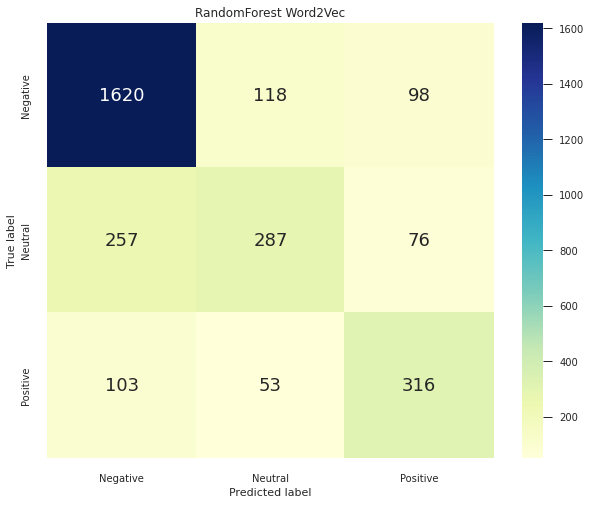

In [928]:
make_confusion_matrix(rf_w2v_randomCV, 
                      X_test=X_test_w2v,y_test=y_test_w2v,
                      desc="RandomForest Word2Vec",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [929]:
df_scores = pd.concat([df_scores, df_score_rf_w2v],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
2  RandomForest Word2Vec 0.9316          0.7592         0.9319             
1       RandomForest BOW 0.7018          0.6728         0.7999             
0    RandomForest TF-IDF 0.6401          0.6475         0.7438             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
2 0.7497          0.9316        0.7592       0.9314    0.7511    
1 0.7561          0.7018        0.6728       0.7214    0.6927    
0 0.7465          0.6401        0.6475       0.6622    0.6693

In [930]:
# The Word2vec used transformed vectorizer, 
# whose features does not map to individual words.
# Hence, feature importance wont tell the important words. 

# 8. LSTM Deep Learning Model

Bi directional LSTM (Recurrent Neural Network)

In [931]:
df_clean_tweet.sample(20) # check samples

Unnamed: 0  \
6083    6083        
7145    7145        
3364    3364        
13071  13071        
7199    7199        
8339    8339        
652      652        
7802    7802        
11281  11281        
11317  11317        
4952    4952        
10526  10526        
5810    5810        
9092    9092        
5214    5214        
8624    8624        
10305  10305        
9158    9158        
400      400        
14012  14012        

      text                                                                                                                                           \
6083                                  @SouthwestAir We've been sitting at the gate for two hours waiting for bags to be loaded... I'm telling Herb.   
7145                                                                                                                                 @JetBlue woof.   
3364                                                                                                         @united how's my refund coming along??   
13071  @AmericanAir 2 hours now!  No I'm not patient.  Why don't you have a call back feature or pay someone to answer the phone, not tweet #onhold   
7199                                                                           @JetBlue I believe you have to follow me so I can send you a message   
8339        @JetBlue i am sharing it to the public. I fly 20 times a year and sitting now on the tarmac in fll. Your staff is the worst i ever met.   
652                                                                                     @united yes please! Trying to get to POP- in Newark now....   
7802                                                                                                                @JetBlue Awesome! Thank you! ;)   
11281    @USAirways : i have been trying to reach dividend miles  to extend my ticket for last 3 days , 20 + calls and i get a message to call back   
11317  @USAirways It's not double booked. I spoke with CS and we've got a plan to fix this. It's still an amateur mistake that should never happen.   
4952                                                                   @SouthwestAir worst air line ever, you have no compassion of the handicapped   
10526    @USAirways Yes, it's February. Bad weather happens every winter. If you guys don't have the business sense to forecast that I'm at a loss.   
5810                  @SouthwestAir please do something about the speed of your WiFi connections on your planes.  It might as well be non-existent.   
9092                     @USAirways @AmericanAir our honeymoon was delayed a day because a gas cap was not screwed on! Flight 1801- so frustrating!   
5214                                            @SouthwestAir but if my bag makes it with me to Greenville tonight then all is forgiven. #HighHopes   
8624                                              @JetBlue Call was not made by the inflight crew. They in fact asked us why we didn't bring it on.   
10305                                 @USAirways @nburnside26 Well if you really didn't like them then she would be on an airplane. #FIOUSAirways 💁   
9158              @USAirways my bag landed 1 day Late Flight at sfo at 11:40am. How can it be 10:01pm and I still don't have it? Flight 719 2/22/14   
400                  .@VirginAmerica If only you guys were starting those flights at the end of the month! Guess I’m still road tripping on Feb 27…   
14012                              @AmericanAir I really want to get home. Tonight, preferably. Please stop delaying my plane 😢😕😦 #AmericanAirlines   

      airline_sentiment  \
6083   negative           
7145    neutral           
3364   negative           
13071  negative           
7199    neutral           
8339   negative           
652     neutral           
7802   positive           
11281  negative           
11317  negative           
4952   negative           
10526  negative           
5810   negative           
9092   negative

## 8.1 Data Split into Train, Validation, Test

Data-split is carried early to avoid data-leakage.

Train :: Validation :: Test = 70 :: 15 :: 15

In [932]:


%%time

# Split dataset into train and test

X_train_lstm, X_test_lstm, \
y_train_lstm, y_test_lstm = train_test_split(
    pd.DataFrame( df_clean_tweet["clean_text"].values.astype('U'), 
                 index=df_clean_tweet.index,
                 ), 
    df_clean_tweet["airline_sentiment"], 
    test_size=0.30, 
    random_state=10,
    stratify=df_clean_tweet["airline_sentiment"])


print("X_train_lstm", X_train_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_train_lstm", y_train_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)


X_train_lstm (10248, 1)
X_test_lstm (4392, 1)
y_train_lstm (10248,)
y_test_lstm (4392,)
CPU times: user 35.1 ms, sys: 0 ns, total: 35.1 ms
Wall time: 34.1 ms


In [933]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6268
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64


In [934]:
X_train_lstm.sample(10)

0                                                                                        
8942                                 omg wish i flight today haha always next time have fun lft
1536                                                                             seat god awful
10546            i hold hours easier way cancel flightget refund expressionless_face weary_face
5417   suggestions tell customers approximate wait time hold min now allow cancel flight online
3345                                                    as always be help communicate customers
13134                           my pleasure next aa flight wednesday milan italy see then happy
11183            get rebooked send a wrong gate travel back b correct flight tiredampfrustrated
11915                                                                  get another flight thank
7437                                        exactly flight delay bdl dca cannot seem get answer
8220                                                           hi i try find flight middle east

In [935]:
y_test_lstm.sample(10)

8753     negative
12590     neutral
3730     positive
9657      neutral
3487      neutral
8683     negative
6986      neutral
8780      neutral
7268     positive
11308    positive
Name: airline_sentiment, dtype: object

In [936]:
%%time

# Split test dataset into validation and test

X_val_lstm, X_test_lstm, \
y_val_lstm, y_test_lstm = train_test_split(
    X_test_lstm, 
    y_test_lstm, 
    test_size=0.50, 
    random_state=10,
    stratify=y_test_lstm)


print("X_val_lstm", X_val_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_val_lstm", y_val_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)

X_val_lstm (2196, 1)
X_test_lstm (2196, 1)
y_val_lstm (2196,)
y_test_lstm (2196,)
CPU times: user 9.69 ms, sys: 0 ns, total: 9.69 ms
Wall time: 8.38 ms


In [937]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_val_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6266
neutral    0.2117
positive   0.1617
Name: airline_sentiment, dtype: float64


In [938]:
X_val_lstm.sample(10)

0                                                                                     
9791                        rant cont to top off reschedule flight tpa already delay how bad
11669                                                                         fly high thank
1769               do bereavement discount airfare grandfather pass need attend funeral week
12276                     guess i get brag you i fly choice unlike others fly not options js
4668                  i stick fly free southwest go son work wonderful company moms fly free
5133   min get bag check n atx miss flight spend day n not get baggage end all epitimeoffail
765                  people counter helpful as see nobody there flight austin still sit here
8974                                                  move delta direct thank accommodations
6038                                thank agent board atlaus leave wallet inbound he find me
6525                  amaze customer service well will definitely fly guy instrument involve

In [939]:
y_val_lstm.sample(10)

10460    negative
13642    negative
9603      neutral
8691     negative
4008      neutral
12989    negative
2831     negative
9730      neutral
13428    negative
10990    positive
Name: airline_sentiment, dtype: object

## 8.2 Tokenization - Data Preprocessing

In [940]:
tokenizer = Tokenizer(num_words = 5000, #vocab_size, input_dim
                      oov_token="<OOV>")

tokenizer.fit_on_texts(X_train_lstm[0])
tokenizer.word_index



{'<OOV>': 1,
 'i': 2,
 'flight': 3,
 'not': 4,
 'get': 5,
 'thank': 6,
 'cancel': 7,
 'service': 8,
 'delay': 9,
 'time': 10,
 'help': 11,
 'you': 12,
 'go': 13,
 'customer': 14,
 'call': 15,
 'fly': 16,
 'us': 17,
 'bag': 18,
 'would': 19,
 'wait': 20,
 'make': 21,
 'hold': 22,
 'hours': 23,
 'need': 24,
 'be': 25,
 'amp': 26,
 'cannot': 27,
 'try': 28,
 'plane': 29,
 'still': 30,
 'one': 31,
 'please': 32,
 'gate': 33,
 'book': 34,
 'seat': 35,
 'say': 36,
 'flightled': 37,
 'take': 38,
 'tell': 39,
 'back': 40,
 'do': 41,
 'change': 42,
 'hour': 43,
 'face': 44,
 'it': 45,
 'phone': 46,
 'check': 47,
 'no': 48,
 'know': 49,
 'late': 50,
 'guy': 51,
 'today': 52,
 'like': 53,
 'work': 54,
 'now': 55,
 'give': 56,
 'airline': 57,
 'miss': 58,
 'ticket': 59,
 'leave': 60,
 'me': 61,
 'way': 62,
 'could': 63,
 'board': 64,
 'airport': 65,
 'want': 66,
 'day': 67,
 'send': 68,
 'travel': 69,
 'hrs': 70,
 'really': 71,
 'sit': 72,
 'great': 73,
 'love': 74,
 'this': 75,
 'never': 76,
 'ha

In [941]:
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_lstm[0])

print(train_sequences[10]), len(train_sequences[10])

[6, 1615, 8, 268, 1998, 1187, 103]


(None, 7)

In [942]:
print(train_sequences[0]), len(train_sequences[0])

[2, 78, 1993, 3977, 741, 762, 2, 872, 2, 466, 2904]


(None, 11)

In [943]:
print(train_sequences[100]), len(train_sequences[100])

[32, 68, 11, 261, 255, 3, 340, 35, 565, 188]


(None, 10)

Data distrubution of sequence length


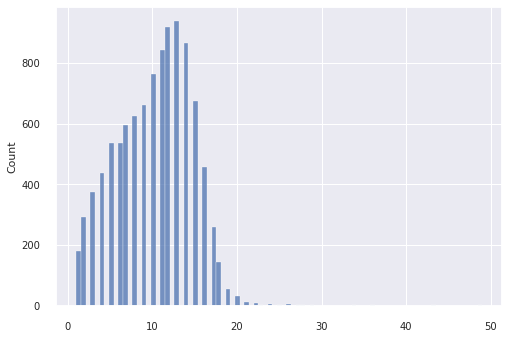

In [944]:
len_train_seq = [ len(i) for i in train_sequences]

print("Data distrubution of sequence length")

sns.histplot(data =len_train_seq);

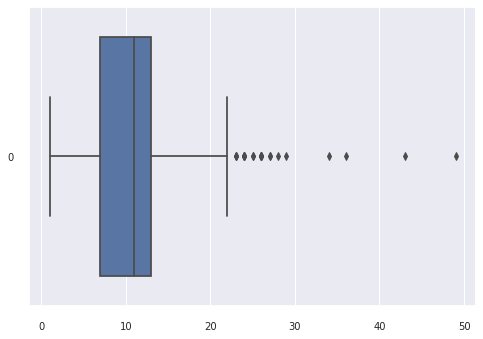

In [945]:
sns.boxplot(data =len_train_seq, orient="h");

### Observation by Sanjib:

1. Most of the lengths of sequences are under 20. 

In [946]:
"""
  IMPORTANT NOTE: 
    We observed that tweets generally have the sentiment 
    expressed towards end of tweet, as conclusion. Hence
    words towards end of tweet are important in sentiment
    classification. 
    We'll go for "pre" padding, and "pre" truncating. 
"""

train_padded = pad_sequences(
    train_sequences, 
    maxlen=20,            # maximum length of all sequences. 
    padding="pre", 
    truncating="pre")

In [947]:
train_padded[10] # length of sequence was 12

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    6, 1615,    8,  268, 1998, 1187,  103], dtype=int32)

In [948]:
# testing a few more samples of padding, 
# comparing with original length of sequence

[ print(
  "length of train_sequence[{}], train_paddded[{}]= {} ".format(
  i,i,train_padded[i]))  for i in [0,10, 100, 200, 500, 1000, 1500]] 

length of train_sequence[0], train_paddded[0]= [   0    0    0    0    0    0    0    0    0    2   78 1993 3977  741
  762    2  872    2  466 2904] 
length of train_sequence[10], train_paddded[10]= [   0    0    0    0    0    0    0    0    0    0    0    0    0    6
 1615    8  268 1998 1187  103] 
length of train_sequence[100], train_paddded[100]= [  0   0   0   0   0   0   0   0   0   0  32  68  11 261 255   3 340  35
 565 188] 
length of train_sequence[200], train_paddded[200]= [   0    0    0    0    0    0    0    0    0    0   73    3 1287 2018
   29    2  102 4073  162  102] 
length of train_sequence[500], train_paddded[500]= [   0    0    0    0    0    0    0    0    0   71 1491   97  615  242
  215  561  582  283   99  215] 
length of train_sequence[1000], train_paddded[1000]= [   0    0    0    0    0    0    0    0   19  208    2   63  233  108
  531    5  651 1515   26  165] 
length of train_sequence[1500], train_paddded[1500]= [   0    0    0    0    0    0    0    0 

[None, None, None, None, None, None, None]

In [949]:


# apply same transformation on the 
# validation and test data set

#### Validation Data
val_sequences = tokenizer.texts_to_sequences(X_val_lstm[0])
val_padded = pad_sequences(val_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Val Sequence", len(val_sequences))
print("Val Padded", val_padded.shape)

#### Validation Data
test_sequences = tokenizer.texts_to_sequences(X_test_lstm[0])
test_padded = pad_sequences(test_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Test Sequence", len(test_sequences))
print("Test Padded", test_padded.shape)

Val Sequence 2196
Val Padded (2196, 20)
Test Sequence 2196
Test Padded (2196, 20)


In [950]:
# label data encoding starts
y_train_lstm.sample(10)

11210    negative
4793     negative
9822     negative
11223     neutral
7846     negative
7882      neutral
1122     negative
7969      neutral
10284    negative
1007     negative
Name: airline_sentiment, dtype: object

In [951]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df_clean_tweet["airline_sentiment"])

training_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_train_lstm))

val_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_val_lstm))

test_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_test_lstm))

label_tokenizer.word_index

{'negative': 1, 'neutral': 2, 'positive': 3}

In [952]:
# testing a few samples

[ print("training_label_seq[{}]={} ; val_label_seq[{}]={}; testing_label_seq[{}]={}".format(
    i,training_label_seq[i],
    i,val_label_seq[i],
    i,test_label_seq[i])) for i in np.arange(5)]

training_label_seq[0]=[1] ; val_label_seq[0]=[2]; testing_label_seq[0]=[1]
training_label_seq[1]=[1] ; val_label_seq[1]=[1]; testing_label_seq[1]=[1]
training_label_seq[2]=[1] ; val_label_seq[2]=[2]; testing_label_seq[2]=[2]
training_label_seq[3]=[1] ; val_label_seq[3]=[2]; testing_label_seq[3]=[1]
training_label_seq[4]=[1] ; val_label_seq[4]=[1]; testing_label_seq[4]=[1]


[None, None, None, None, None]

In [953]:
print(training_label_seq.shape, 
      val_label_seq.shape,
      test_label_seq.shape)

(10248, 1) (2196, 1) (2196, 1)


## 8.3 Build Sequential Model

In [954]:
#Instantiating the Sequential model
model_LSTM = Sequential()                                                                            
#Initializing the embedding layer
model_LSTM.add(Embedding(input_dim=5000,
                    output_dim=64,
                    # 5000, # vocab_size=
                    # 64, embedding_dim=
                    # rnn_units = 64,
                    # BATCH_SIZE=100,
                    input_length=20,
                    # input_dim=10,
                    # output_dim=10               
                    ))  
#Initializing the dropout layer to avoid the overfitting                                               
model_LSTM.add(Dropout(0.5))  
# Initialization of Bi-directional LSTM Layer                                                                       
model_LSTM.add(Bidirectional(LSTM(64)))  # rnn_units
# softmax converts a vector of values to a probability distribution.                                                 
model_LSTM.add(Dense(4, activation='softmax'))                                                     

model_LSTM.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 64)          320000    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 516       
Total params: 386,564
Trainable params: 386,564
Non-trainable params: 0
_________________________________________________________________


**Embedding Layer**
- Word embeddings allow the value of the vector’s element to be trained. After training, words with similar meanings often have similar vectors.

**Dropout Layer**
- Adding the dropout layer to combat overfitting.

**Bidirectional LSTM Layer**
- The Bidirectional layer propagates the input forward and backwards through the LSTM layer and then concatenates the output. This helps the LSTM to learn long range dependencies.

**Dense Layer**
- This the final layer, the Dense layer with softmax activation for the multi-class classification.

In [955]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6)

#crossentropy loss function when there are two or more label classes.

model_LSTM.compile(
    # loss='categorical_crossentropy',  
    loss='sparse_categorical_crossentropy',      
    optimizer=opt,
    metrics=['accuracy'],
)

In [956]:
%%time

# Model hyper parameter tunning 
es = EarlyStopping(monitor='val_loss', min_delta=0.01,
                   mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', 
                     mode='max', verbose=1, save_best_only=True)


history = model_LSTM.fit(train_padded, 
              training_label_seq, 
              epochs=100, 
              validation_data=(val_padded, val_label_seq), 
              verbose=2,
              batch_size=36,
              callbacks=[es, mc],
              use_multiprocessing=True) 

Epoch 1/100
285/285 - 5s - loss: 1.3357 - accuracy: 0.5415 - val_loss: 1.2571 - val_accuracy: 0.6270

Epoch 00001: val_accuracy improved from -inf to 0.62705, saving model to best_model.h5
Epoch 2/100
285/285 - 1s - loss: 1.1075 - accuracy: 0.6270 - val_loss: 1.0028 - val_accuracy: 0.6270

Epoch 00002: val_accuracy did not improve from 0.62705
Epoch 3/100
285/285 - 1s - loss: 0.9550 - accuracy: 0.6270 - val_loss: 0.9242 - val_accuracy: 0.6270

Epoch 00003: val_accuracy did not improve from 0.62705
Epoch 4/100
285/285 - 1s - loss: 0.9078 - accuracy: 0.6270 - val_loss: 0.8935 - val_accuracy: 0.6270

Epoch 00004: val_accuracy did not improve from 0.62705
Epoch 5/100
285/285 - 1s - loss: 0.8765 - accuracy: 0.6270 - val_loss: 0.8565 - val_accuracy: 0.6270

Epoch 00005: val_accuracy did not improve from 0.62705
Epoch 6/100
285/285 - 1s - loss: 0.8391 - accuracy: 0.6270 - val_loss: 0.8221 - val_accuracy: 0.6270

Epoch 00006: val_accuracy did not improve from 0.62705
Epoch 7/100
285/285 - 1s -

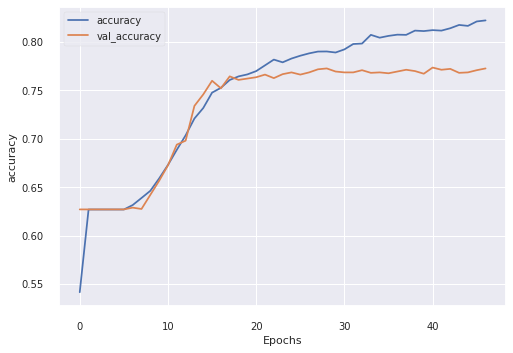

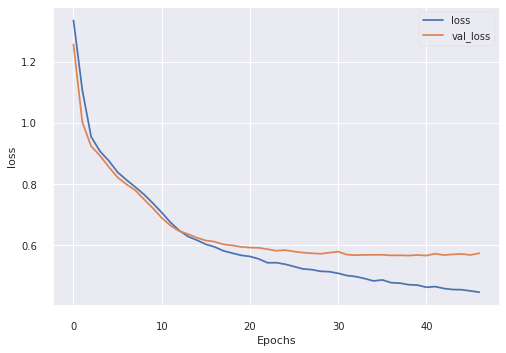

CPU times: user 512 ms, sys: 12.8 ms, total: 524 ms
Wall time: 14.9 s


In [957]:

%%time
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 8.4 Performance of LSTM Model

In [958]:
# The shape of above two graphs are decent 

# Test data set is unseen for model LSTM
score = model_LSTM.evaluate(test_padded, test_label_seq)

69/69 [==============================] - 1s 3ms/step - loss: 0.5681 - accuracy: 0.7714


In [959]:
print(score, score[1]) 

[0.5681326389312744, 0.7714025378227234] 0.7714025378227234


In [960]:
# training accuracy
accuracy_train = history.history.get("accuracy")[-1]
accuracy_train


0.8224043846130371

In [961]:
# validation accuracy
accuracy_val = history.history.get("val_accuracy")[-1]
accuracy_val

0.7727686762809753

In [962]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_LSTM(model, 
            test_padded, test_label_seq, y_test,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get("accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get("val_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 

  # Test accuracy
  score = model_LSTM.evaluate(test_padded, test_label_seq)
  accuracy_test = score[1]
  print("ACCURACY TEST =", accuracy_val) 

  # accuracy_test =  accuracy_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln) 
  # print("ACCURACY TEST =", accuracy_test) 

  # Test recall
  # recall_test =  recall_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln, average="weighted") 
  # print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************
  # precision_test =  precision_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln, average="weighted") 
  # print("PRECISION TEST =", precision_test) 

  # f1_test = f1_score( np.argmax(y_test, axis=1), 
  #               y_test_pred_classes_ln, average='weighted')
  # print("F1 TEST =", f1_test) 

  y_test_pred = model.predict(test_padded)

  # Encode classes into numbers
  y_test_int = y_test.replace({"negative": 1, 
                "neutral": 2, 
                "positive": 3}).astype("uint8")  

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_int,
              np.argmax(y_test_pred,axis=1)
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  desc = desc + " Accuracy-Val={:,.4f}".format(accuracy_val)

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-test" : np.nan,
                        "Recall-Train": np.nan,
                        "Recall-Test": np.nan,
                        "F1-Train": np.nan,
                        "F1-Test": np.nan,
                        },
                      index=[0] )



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


ACCURACY TRAIN = 0.8224043846130371
ACCURACY VALIDATION = 0.7727686762809753
69/69 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7714
ACCURACY TEST = 0.7727686762809753


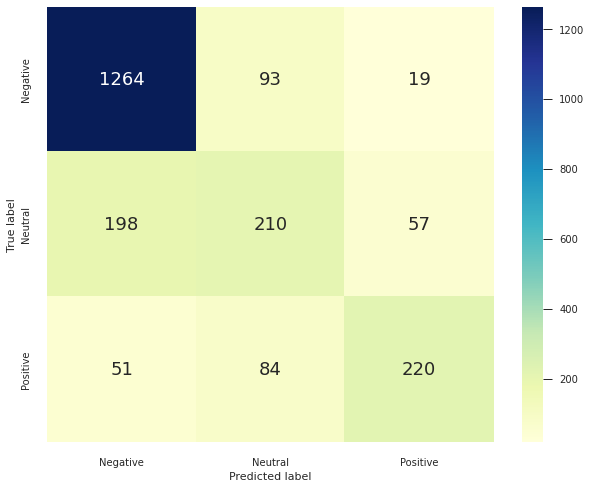

In [963]:
# save the results in a dataframe
df_score_lstm = make_confusion_matrix_LSTM(
                    model=model_LSTM, 
                    test_padded=test_padded, 
                    test_label_seq=test_label_seq, 
                    y_test=y_test_lstm, 
                    history=history,
                    desc="Bi-LSTM", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

In [964]:
df_score_lstm

Description                   Accuracy-Train  Accuracy-Test  \
0  Bi-LSTM Accuracy-Val=0.7728 0.8224          0.7714           

   Precision-Train  Precision-test  Recall-Train  Recall-Test  F1-Train  \
0 nan              nan             nan           nan          nan         

   F1-Test  
0 nan

In [965]:
df_scores = pd.concat([df_scores, df_score_lstm],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test"], ascending=False)

Description                   Accuracy-Train  Accuracy-Test  \
3  Bi-LSTM Accuracy-Val=0.7728 0.8224          0.7714           
2        RandomForest Word2Vec 0.9316          0.7592           
1             RandomForest BOW 0.7018          0.6728           
0          RandomForest TF-IDF 0.6401          0.6475           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
3    nan              nan             nan           nan          nan      
2 0.9319           0.7497          0.9316        0.7592       0.9314      
1 0.7999           0.7561          0.7018        0.6728       0.7214      
0 0.7438           0.7465          0.6401        0.6475       0.6622      

   F1-Test  Precision-test  
3    nan   nan              
2 0.7511   nan              
1 0.6927   nan              
0 0.6693   nan

In [966]:
%%time

model_LSTM.save(("/content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


CPU times: user 11.2 s, sys: 217 ms, total: 11.4 s
Wall time: 11.3 s


In [967]:

# Pretrained model

# 9. Model Selection

In [968]:
df_scores_sorted = \
                  df_scores.sort_values(
                      by=["Accuracy-Test"],
                      ascending=False,
                      ignore_index=True,
                      inplace=False,
                  )


In [969]:
df_scores_sorted

Description                   Accuracy-Train  Accuracy-Test  \
0  Bi-LSTM Accuracy-Val=0.7728 0.8224          0.7714           
1        RandomForest Word2Vec 0.9316          0.7592           
2             RandomForest BOW 0.7018          0.6728           
3          RandomForest TF-IDF 0.6401          0.6475           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0    nan              nan             nan           nan          nan      
1 0.9319           0.7497          0.9316        0.7592       0.9314      
2 0.7999           0.7561          0.7018        0.6728       0.7214      
3 0.7438           0.7465          0.6401        0.6475       0.6622      

   F1-Test  Precision-test  
0    nan   nan              
1 0.7511   nan              
2 0.6927   nan              
3 0.6693   nan

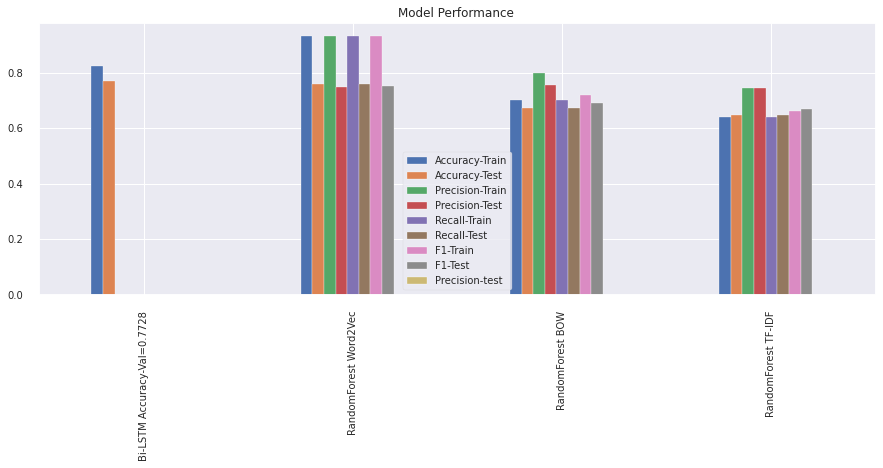

In [970]:
# plot models's performance
fig, axs = plt.subplots(figsize=(15, 5))
df_scores_sorted.plot(kind="bar", ax=axs, legend=True)
plt.title("Model Performance ")
plt.xticks(ticks=df_scores.index, labels=df_scores_sorted["Description"])
fig.show()

In [971]:
# in the plot above the top performing model, first one,
#  is also balanced w.r.t. overfitting
df_scores_sorted.loc[0,"Description"] # the best performed model

'Bi-LSTM Accuracy-Val=0.7728'

# 10. Key Takeaways - Insights



# 11. Appendix

*Next Steps :*

1. In order to productionize the code, the Notebook needs to saved as *.py file (Python).
2. Also, the code needs to be organized in functions and classes (Object Oriented Programming) for re-use. The code of Data Processing can be combined into generic function to apply in number of use cases, e.g. method of class 'EDA' (Exploratory Data Analysis), also useful during model prediction in production.
3. We need to introduce exception handling in the code, try-catch-finally, and logging.
4. We need to save processed data, results, graphs etc. into persistance store (e.g. disk).

Assumption: Productionization of Code is not in the scope of this assignment, even though I am capable of implementing it.

_____________________________________________________________________________________________________
Thank you for your reading of this Notebook. Please share your suggestions, comments to <sanjib007@gmail.com>

_______________________________________________________________________________________________________________

#  --   The End --